# cVegandClandCterrestrial_250625

In [2]:
#IMPORT NEEDED LIBRARIES
import seaborn as sns
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms  # Add this line if transforms are needed
from matplotlib.ticker import MaxNLocator #For ticks adjustment
from matplotlib.ticker import MaxNLocator
from datetime import datetime
from sklearn.linear_model import LinearRegression
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import statsmodels.api as sm
from matplotlib.dates import date2num
import tempfile
import fsspec
%matplotlib inline
import warnings
warnings.simplefilter("ignore") 
import openpyxl

In [ ]:
cd /path_to/modelsVegCarbonContentAccumulation

In [17]:
#Load all the  vegetation carbon content and accumulation data
aces = pd.read_csv('aces_carbon_content_accumulation_1850_2014.csv')
caes = pd.read_csv('caes_carbon_content_accumulation_1850_2014.csv')
cesm = pd.read_csv('cesm_carbon_content_accumulation_1850_2014.csv')
cewa = pd.read_csv('cewa_carbon_content_accumulation_1850_2014.csv')
cmcs = pd.read_csv('cmcs_carbon_content_accumulation_1850_2014.csv')
cmes = pd.read_csv('cmes_carbon_content_accumulation_1850_2014.csv')
cncm = pd.read_csv('cncm_carbon_content_accumulation_1850_2014.csv')
cnes = pd.read_csv('cnes_carbon_content_accumulation_1850_2014.csv')
mpel = pd.read_csv('mpel_carbon_content_accumulation_1850_2014.csv')
mpeh = pd.read_csv('mpeh_carbon_content_accumulation_1850_2014.csv')
ukes = pd.read_csv('ukes_carbon_content_accumulation_1850_2014.csv')

## Deal with the carbon content

In [18]:
#Extract the total crop carbon content
aces1 = aces['Crp_Carbon_Content']
caes1 = caes['Crp_Carbon_Content']
cesm1 = cesm['Crp_Carbon_Content']
cewa1 = cewa['Crp_Carbon_Content']
cmcs1 = cmcs['Crp_Carbon_Content']
cmes1 = cmes['Crp_Carbon_Content']
cncm1 = cncm['Crp_Carbon_Content']
cnes1 = cnes['Crp_Carbon_Content']
mpeh1 = mpeh['Crp_Carbon_Content']
mpel1 = mpel['Crp_Carbon_Content']
ukes1 = ukes['Crp_Carbon_Content']

#Stack them together
crp = np.vstack([aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                   cncm1, cnes1, mpeh1, mpel1, ukes1])

#Calculate the ensemble mean
crp_mean = (aces1 + caes1 + cesm1 + cewa1 + cmcs1 + cmes1 + 
            cncm1 + cnes1 + mpeh1 + mpel1 + ukes1)/11

In [45]:
upp_range = cncm1.iloc[-1]/10e11 - crp_mean.iloc[-1]/10e11
low_range = cmes1.iloc[-1]/10e11 - crp_mean.iloc[-1]/10e11

mean = crp_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 39.52777718181818
Lower range: -14.727713181818181
Upper range: 26.29394281818182


In [43]:
#Extract the total natural vegetation carbon content
aces2 = aces['Totnat_Carbon_Content']
caes2 = caes['Totnat_Carbon_Content']
cesm2 = cesm['Totnat_Carbon_Content']
cewa2 = cewa['Totnat_Carbon_Content']
cmcs2 = cmcs['Totnat_Carbon_Content']
cmes2 = cmes['Totnat_Carbon_Content']
cncm2 = cncm['Totnat_Carbon_Content']
cnes2 = cnes['Totnat_Carbon_Content']
mpeh2 = mpeh['Totnat_Carbon_Content']
mpel2 = mpel['Totnat_Carbon_Content']
ukes2 = ukes['Totnat_Carbon_Content']

#Stack them together
nat = np.vstack([aces2, caes2, cesm2, cewa2, cmcs2, cmes2, 
                   cncm2, cnes2, mpeh2, mpel2, ukes2])

#Calculate the ensemble mean
nat_mean = (aces2 + caes2 + cesm2 + cewa2 + cmcs2 + cmes2 + 
            cncm2 + cnes2 + mpeh2 + mpel2 + ukes2)/11

In [44]:
upp_range = aces2.iloc[-1]/10e11 - nat_mean.iloc[-1]/10e11
low_range = mpel2.iloc[-1]/10e11 - nat_mean.iloc[-1]/10e11

mean = nat_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 415.9244663636364
Lower range: -88.1385063636364
Upper range: 157.09753363636366


In [39]:
#Extract the total vegetation area
aces3 = aces['Tot_Carbon_Content']
caes3 = caes['Tot_Carbon_Content']
cesm3 = cesm['Tot_Carbon_Content']
cewa3 = cewa['Tot_Carbon_Content']
cmcs3 = cmcs['Tot_Carbon_Content']
cmes3 = cmes['Tot_Carbon_Content']
cncm3 = cncm['Tot_Carbon_Content']
cnes3 = cnes['Tot_Carbon_Content']
mpeh3 = mpeh['Tot_Carbon_Content']
mpel3 = mpel['Tot_Carbon_Content']
ukes3 = ukes['Tot_Carbon_Content']

#Stack them together
tot = np.vstack([aces3, caes3, cesm3, cewa3, cmcs3, cmes3, 
                   cncm3, cnes3, mpeh3, mpel3, ukes3])

#Calculate the ensemble mean
tot_mean = (aces3 + caes3 + cesm3 + cewa3 + cmcs3 + cmes3 + 
            cncm3 + cnes3 + mpeh3 + mpel3 + ukes3)/11

In [38]:
tot_mean.iloc[-1]/10e11

np.float64(489.70099636363636)

In [42]:
upp_range = aces3.iloc[-1]/10e11 - tot_mean.iloc[-1]/10e11
low_range = mpel3.iloc[-1]/10e11 - tot_mean.iloc[-1]/10e11

mean = tot_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 489.70099636363636
Lower range: -114.30863636363637
Upper range: 182.34010363636366


In [50]:
#Extract the C3 crop carbon content
aces4 = aces['C3crp_Carbon_Content']
caes4 = caes['C3crp_Carbon_Content']
cesm4 = cesm['C3crp_Carbon_Content']
cewa4 = cewa['C3crp_Carbon_Content']
cmcs4 = cmcs['C3crp_Carbon_Content']
cmes4 = cmes['C3crp_Carbon_Content']
cncm4 = cncm['C3crp_Carbon_Content']
cnes4 = cnes['C3crp_Carbon_Content']
mpeh4 = mpeh['C3crp_Carbon_Content']
mpel4 = mpel['C3crp_Carbon_Content']
ukes4 = ukes['C3crp_Carbon_Content']

#Stack them together
crpC3 = np.vstack([aces4, caes4, cesm4, cewa4, cmcs4, cmes4, 
                   cncm4, cnes4, mpeh4, mpel4, ukes4])

#Calculate the ensemble mean
crpC3_mean = (aces4 + caes4 + cesm4 + cewa4 + cmcs4 + cmes4 + 
            cncm4 + cnes4 + mpeh4 + mpel4 + ukes4)/11

In [51]:
upp_range = aces4.iloc[-1]/10e11 - crpC3_mean.iloc[-1]/10e11
low_range = ukes4.iloc[-1]/10e11 - crpC3_mean.iloc[-1]/10e11

mean = crpC3_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 32.35007327272727
Lower range: -19.291504272727273
Upper range: 24.145176727272727


In [56]:
#Extract the C4 crop carbon content 
aces4a = aces['C4crp_Carbon_Content']
caes4a = caes['C4crp_Carbon_Content']
cesm4a = cesm['C4crp_Carbon_Content']
cewa4a = cewa['C4crp_Carbon_Content']
cmcs4a = cmcs['C4crp_Carbon_Content']
cmes4a = cmes['C4crp_Carbon_Content']
cncm4a = cncm['C4crp_Carbon_Content']
cnes4a = cnes['C4crp_Carbon_Content']
mpeh4a = mpeh['C4crp_Carbon_Content']
mpel4a = mpel['C4crp_Carbon_Content']
ukes4a = ukes['C4crp_Carbon_Content']

#Stack them together
crpC4 = np.vstack([aces4a, caes4a, cesm4a, cewa4a, cmcs4a, cmes4a, 
                   cncm4a, cnes4a, mpeh4a, mpel4a, ukes4a])

#Calculate the ensemble mean
crpC4_mean = (aces4a + caes4a + cesm4a + cewa4a + cmcs4a + cmes4a + 
            cncm4a + cnes4a + mpeh4a + mpel4a + ukes4a)/11

In [57]:
upp_range = ukes4a.iloc[-1]/10e11 - crpC4_mean.iloc[-1]/10e11
low_range = cmcs4a.iloc[-1]/10e11 - crpC4_mean.iloc[-1]/10e11

mean = crpC4_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 6.240455672727273
Lower range: -6.240455672727273
Upper range: 17.850259327272727


In [48]:
#Extract the C3 natural vegetation carbon content
aces5 = aces['C3nat_Carbon_Content']
caes5 = caes['C3nat_Carbon_Content']
cesm5 = cesm['C3nat_Carbon_Content']
cewa5 = cewa['C3nat_Carbon_Content']
cmcs5 = cmcs['C3nat_Carbon_Content']
cmes5 = cmes['C3nat_Carbon_Content']
cncm5 = cncm['C3nat_Carbon_Content']
cnes5 = cnes['C3nat_Carbon_Content']
mpeh5 = mpeh['C3nat_Carbon_Content']
mpel5 = mpel['C3nat_Carbon_Content']
ukes5 = ukes['C3nat_Carbon_Content']

#Stack them together
natC3 = np.vstack([aces5, caes5, cesm5, cewa5, cmcs5, cmes5, 
                   cncm5, cnes5, mpeh5, mpel5, ukes5])

#Calculate the ensemble mean
natC3_mean = (aces5 + caes5 + cesm5 + cewa5 + cmcs5 + cmes5 + 
            cncm5 + cnes5 + mpeh5 + mpel5 + ukes5)/11

In [49]:
upp_range = aces5.iloc[-1]/10e11 - C3_mean.iloc[-1]/10e11
low_range = mpel5.iloc[-1]/10e11 - C3_mean.iloc[-1]/10e11

mean = C3_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 374.68895636363635
Lower range: -86.88698636363637
Upper range: 162.09716363636363


In [54]:
#Extract the C4 natural vegetation carbon content
aces5a = aces['C4nat_Carbon_Content']
caes5a = caes['C4nat_Carbon_Content']
cesm5a = cesm['C4nat_Carbon_Content']
cewa5a = cewa['C4nat_Carbon_Content']
cmcs5a = cmcs['C4nat_Carbon_Content']
cmes5a = cmes['C4nat_Carbon_Content']
cncm5a = cncm['C4nat_Carbon_Content']
cnes5a = cnes['C4nat_Carbon_Content']
mpeh5a = mpeh['C4nat_Carbon_Content']
mpel5a = mpel['C4nat_Carbon_Content']
ukes5a = ukes['C4nat_Carbon_Content']

#Stack them together
natC4 = np.vstack([aces5a, caes5a, cesm5a, cewa5a, cmcs5a, cmes5a, 
                   cncm5a, cnes5a, mpeh5a, mpel5a, ukes5a])

#Calculate the ensemble mean
natC4_mean = (aces5a + caes5a + cesm5a + cewa5a + cmcs5a + cmes5a + 
            cncm5a + cnes5a + mpeh5a + mpel5a + ukes5a)/11

In [55]:
upp_range = ukes5a.iloc[-1]/10e11 - natC4_mean.iloc[-1]/10e11
low_range = cmes5a.iloc[-1]/10e11 - natC4_mean.iloc[-1]/10e11

mean = natC4_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 41.235516909090904
Lower range: -12.511978909090903
Upper range: 11.505729090909092


In [46]:
#Extract the C3 vegetation carbon content
aces6 = aces['C3_Carbon_Content']
caes6 = caes['C3_Carbon_Content']
cesm6 = cesm['C3_Carbon_Content']
cewa6 = cewa['C3_Carbon_Content']
cmcs6 = cmcs['C3_Carbon_Content']
cmes6 = cmes['C3_Carbon_Content']
cncm6 = cncm['C3_Carbon_Content']
cnes6 = cnes['C3_Carbon_Content']
mpeh6 = mpeh['C3_Carbon_Content']
mpel6 = mpel['C3_Carbon_Content']
ukes6 = ukes['C3_Carbon_Content']

#Stack them together
C3 = np.vstack([aces6, caes6, cesm6, cewa6, cmcs6, cmes6, 
                   cncm6, cnes6, mpeh6, mpel6, ukes6])

#Calculate the ensemble mean
C3_mean = (aces6 + caes6 + cesm6 + cewa6 + cmcs6 + cmes6 + 
            cncm6 + cnes6 + mpeh6 + mpel6 + ukes6)/11

In [47]:
upp_range = aces6.iloc[-1]/10e11 - C3_mean.iloc[-1]/10e11
low_range = mpel6.iloc[-1]/10e11 - C3_mean.iloc[-1]/10e11

mean = C3_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 407.0390336363636
Lower range: -90.59191363636364
Upper range: 186.24236636363634


In [26]:
#Extract the C4 vegetation carbon content
aces6a = aces['C4_Carbon_Content']
caes6a = caes['C4_Carbon_Content']
cesm6a = cesm['C4_Carbon_Content']
cewa6a = cewa['C4_Carbon_Content']
cmcs6a = cmcs['C4_Carbon_Content']
cmes6a = cmes['C4_Carbon_Content']
cncm6a = cncm['C4_Carbon_Content']
cnes6a = cnes['C4_Carbon_Content']
mpeh6a = mpeh['C4_Carbon_Content']
mpel6a = mpel['C4_Carbon_Content']
ukes6a = ukes['C4_Carbon_Content']

#Stack them together
C4 = np.vstack([aces6a, caes6a, cesm6a, cewa6a, cmcs6a, cmes6a, 
                   cncm6a, cnes6a, mpeh6a, mpel6a, ukes6a])

#Calculate the ensemble mean
C4_mean = (aces6a + caes6a + cesm6a + cewa6a + cmcs6a + cmes6a + 
            cncm6a + cnes6a + mpeh6a + mpel6a + ukes6a)/11

In [53]:
upp_range = cncm6a.iloc[-1]/10e11 - C4_mean.iloc[-1]/10e11
low_range = caes6a.iloc[-1]/10e11 - C4_mean.iloc[-1]/10e11

mean = C4_mean.iloc[-1]/10e11
print('Mean:', mean)
print('Lower range:', low_range)
print('Upper range:', upp_range)

Mean: 47.47597118181818
Lower range: -10.727467181818184
Upper range: 21.339022818181817


## Create the function to plot

In [27]:
from matplotlib.ticker import MaxNLocator #For ticks adjustment

def plot_fig(ax, years, y, mean):
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
    labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
                'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
    
    # Plot each model's line
    for i in range(y.shape[0]):
        ax.plot(years, y[i] / 10**6, label=labels[i], color=colors[i],
                linestyle=linestyles[i], linewidth=2.5)
    
    # Plot the ensemble mean line
    ax.plot(years, mean / 10**6, color='black', 
            label='Ensemble mean', linestyle='-', linewidth=2.5)
    
    return ax

## Create the Plot

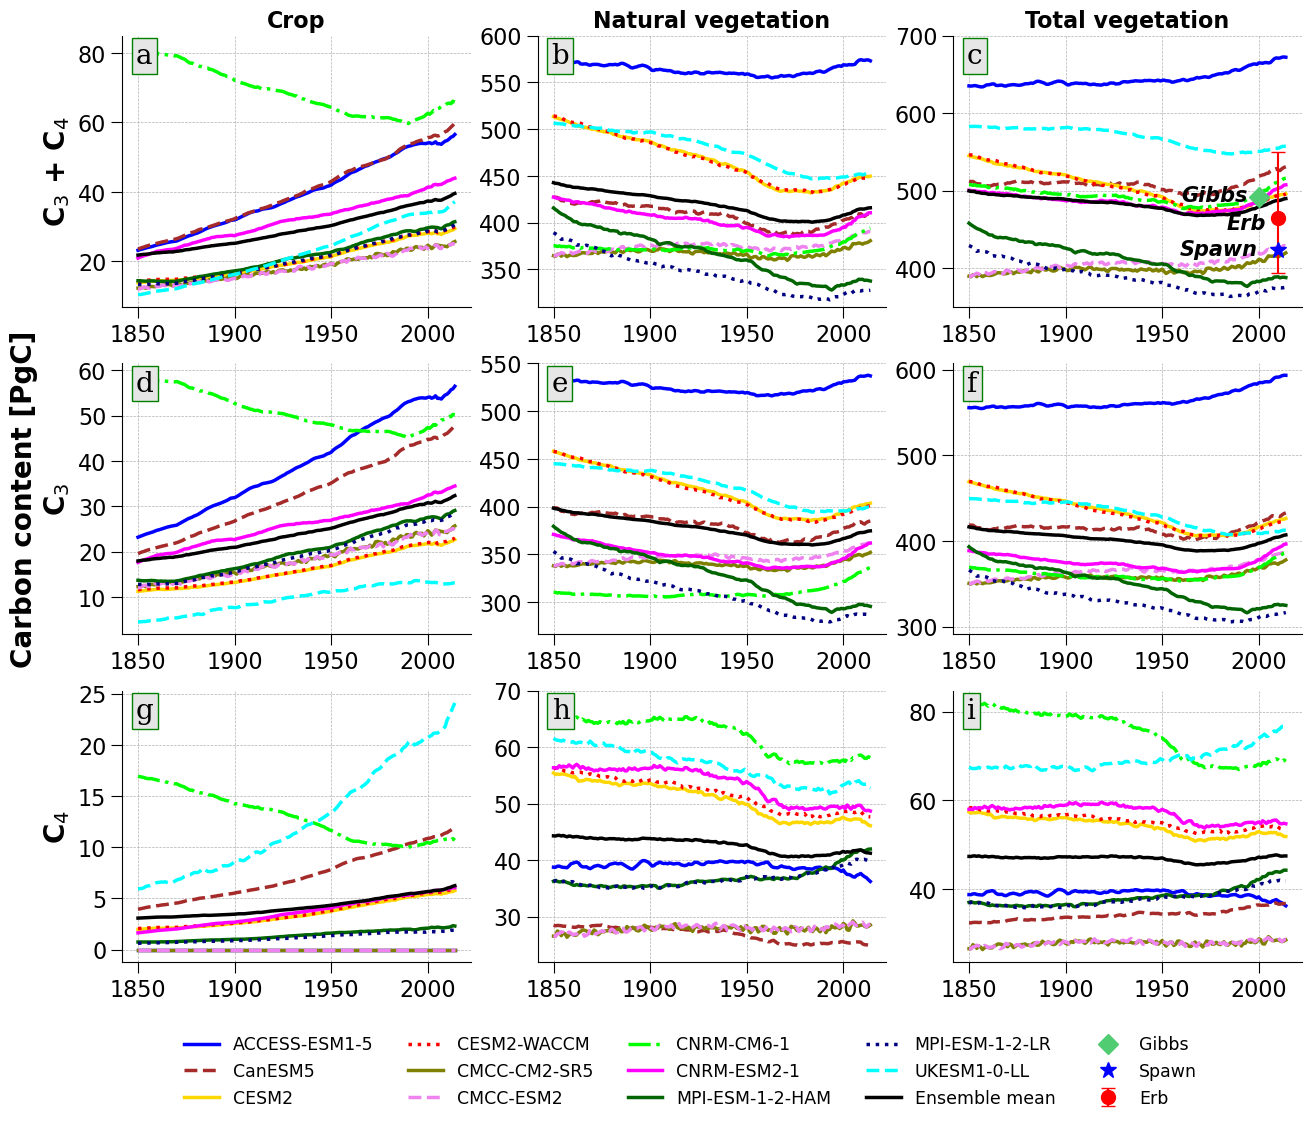

In [35]:
from matplotlib.ticker import MaxNLocator #For ticks adjustment
# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']],
                              figsize=(13, 10), layout="constrained")

years = np.arange(1850, 2015)  # The years for the x-axis

# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['a'], years=years, y=crp/10E5, mean=crp_mean/10E5)
axs['a'].set_ylabel(r'C$_{3}$ + C$_{4}$', fontsize=20, weight='bold')
axs['a'].set_title('Crop', fontsize=16, weight = 'bold')
axs['a'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)

# Plotting the natural on the 'e' axis of the mosaic
plot_fig(ax=axs['b'], years=years, y=nat/10E5, mean=nat_mean/10E5)
axs['b'].set_ylim(310, 600)

axs['b'].set_title('Natural vegetation', fontsize=16, weight = 'bold')
axs['b'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['b'].spines['right'].set_visible(False)
axs['b'].spines['top'].set_visible(False)
axs['b'].grid(linestyle='--', linewidth=0.5) 



# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['c'], years=years, y=tot/10E5, mean=tot_mean/10E5)

axs['c'].plot(years[-15], 492.3, 'D', color = '#52cc72', markersize=10, label = 'Gibbs')
axs['c'].text(0.655, 0.45, 'Gibbs',  # Changed vertical position to 0.9 (top)
        transform=axs['c'].transAxes,  # Changed transform to axs['a']
            fontsize=15, color='black', ha='left', va='top',
            weight='bold', style='italic')

# Deal with the error bar in Erb
mean = 464.3
min_val = 394.3
max_val = 550.3
# Calculate asymmetric error
lower_error = mean - min_val
upper_error = max_val - mean
# Error as a tuple for asymmetric bars: (lower, upper)
error = [[lower_error], [upper_error]]
# Plot
axs['c'].errorbar(years[-5], y=[mean], yerr=error, fmt='o', color='red', 
                  capsize=5, markersize=10, label='Erb')
axs['c'].text(0.785, 0.345, 'Erb',  # Changed vertical position to 0.9 (top)
        transform=axs['c'].transAxes,  # Changed transform to axs['a']
            fontsize=15, color='black', ha='left', va='top',
            weight='bold', style='italic')

axs['c'].plot(years[-5], 423.3, '*', color='blue', markersize=12, label='Spawn')
axs['c'].text(0.65, 0.25, 'Spawn',  # Changed vertical position to 0.9 (top)
        transform=axs['c'].transAxes,  # Changed transform to axs['a']
            fontsize=15, color='black', ha='left', va='top',
            weight='bold', style='italic')

axs['c'].set_title('Total vegetation', fontsize=16, weight = 'bold')
axs['c'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['c'].spines['right'].set_visible(False)
axs['c'].spines['top'].set_visible(False)
axs['c'].grid(linestyle='--', linewidth=0.5)
axs['c'].set_ylim(350, 700)


# Plotting the crop on the 'a' axis of the mosaic
plot_fig(ax=axs['d'], years=years, y=crpC3/10E5, mean=crpC3_mean/10E5)

axs['d'].set_ylabel(r'Carbon content [PgC]' + '\n' + r'C$_{3}$',
                    fontsize=20, weight='bold')
axs['d'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['d'].spines['right'].set_visible(False)
axs['d'].spines['top'].set_visible(False)
axs['d'].grid(linestyle='--', linewidth=0.5) 


# Plotting the crop on the 'e' axis of the mosaic
plot_fig(ax=axs['e'], years=years, y=natC3/10E5, mean=natC3_mean/10E5)
axs['e'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
#axs['e'].set_ylim(55, 80)
axs['e'].spines['right'].set_visible(False)
axs['e'].spines['top'].set_visible(False)
axs['e'].grid(linestyle ='--', linewidth=0.5) 


# Plotting the total on the 'f' axis of the mosaic
plot_fig(ax=axs['f'], years=years, y=C3/10E5, mean=C3_mean/10E5)
#axs['f'].set_ylim(62, 90)
axs['f'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['f'].spines['right'].set_visible(False)
axs['f'].spines['top'].set_visible(False)
axs['f'].grid(linestyle = '--', linewidth=0.5)

# Plotting the total on the 'g' axis of the mosaic
plot_fig(ax=axs['g'], years=years, y=crpC4/10E5, mean=crpC4_mean/10E5)
#axs['g'].set_ylim(0, 5)

axs['g'].set_ylabel(r'C$_{4}$', fontsize=20, weight = 'bold')
axs['g'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['g'].spines['right'].set_visible(False)
axs['g'].spines['top'].set_visible(False)
axs['g'].grid(linestyle='--', linewidth=0.5) 
    
# Plotting the total on the 'h' axis of the mosaic
plot_fig(ax=axs['h'], years=years, y=natC4/10E5, mean=natC4_mean/10E5)
axs['h'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['h'].spines['right'].set_visible(False)
axs['h'].spines['top'].set_visible(False)
axs['h'].grid(linestyle='--', linewidth=0.5) 
axs['h'].set_ylim(22, 70)


# Plotting the total on the 'i' axis of the mosaic
plot_fig(ax=axs['i'], years=years, y=C4/10E5, mean=C4_mean/10E5)

axs['i'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['i'].spines['right'].set_visible(False)
axs['i'].spines['top'].set_visible(False)
axs['i'].grid(linestyle='--', linewidth=0.5)

#Make the legend
# Combine handles and labels from the relevant axes for the global legend
handles, labels = [], []
for ax_key in ['c', 'g', 'h', 'i']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'c'
fig.legend(handles, labels, fontsize=12.5, loc='upper left', ncol=5,
           bbox_to_anchor=(0.125, 0.3, 0.5, -0.315), frameon=False)

import matplotlib.transforms as mtransforms  # Add this line if transforms are needed
from matplotlib.ticker import MaxNLocator #For ticks adjustment

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='20', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.9', edgecolor='green', pad=3.0))
    
# Save the plot
plt.savefig('PaperFigures_03072025/veg_Carbon_content_1850_2014_250716.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)

    
# Show the plot
plt.show()


## Deal with the carbon accumulation

In [58]:
#Extract the total crop carbon content
aces1 = aces['Crp_Carbon_Content']
caes1 = caes['Crp_Carbon_Content']
cesm1 = cesm['Crp_Carbon_Content']
cewa1 = cewa['Crp_Carbon_Content']
cmcs1 = cmcs['Crp_Carbon_Content']
cmes1 = cmes['Crp_Carbon_Content']
cncm1 = cncm['Crp_Carbon_Content']
cnes1 = cnes['Crp_Carbon_Content']
mpeh1 = mpeh['Crp_Carbon_Content']
mpel1 = mpel['Crp_Carbon_Content']
ukes1 = ukes['Crp_Carbon_Content']

#Stack them together
crp = np.vstack([aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                   cncm1, cnes1, mpeh1, mpel1, ukes1])

#Transpose the column
crp1 = crp.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
crp_df = pd.DataFrame(crp1, columns=column_names)

# calculate the mean
crp_ccMean = crp_df.mean(axis = 1)

crp_df.insert(11, 'Mean', crp_ccMean)
crp_df.insert(0, 'Year', years) 



# Save the crop carbon content DataFrame to a CSV file
#crp_df.to_csv('crop_carbonContent.csv', index=False)
crp_df.head(3)

Year          aces          caes          cesm          cewa          cmcs  \
0  1850  2.317417e+13  2.349168e+13  1.382854e+13  1.429143e+13  1.227963e+13   
1  1851  2.333340e+13  2.371257e+13  1.388106e+13  1.438465e+13  1.232617e+13   
2  1852  2.349069e+13  2.393263e+13  1.396240e+13  1.446617e+13  1.235695e+13   

           cmes          cncm          cnes          mpeh          mpel  \
0  1.200888e+13  8.141064e+13  2.091879e+13  1.440480e+13  1.339711e+13   
1  1.203792e+13  8.125453e+13  2.116903e+13  1.436805e+13  1.336919e+13   
2  1.234476e+13  8.113832e+13  2.139157e+13  1.430008e+13  1.332978e+13   

           ukes          Mean  
0  1.041458e+13  2.178366e+13  
1  1.044064e+13  2.184338e+13  
2  1.050584e+13  2.192902e+13

In [60]:
# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
crp_df1 = crp_df - crp_df.iloc[0]

# Calculate the mean of the accumulation
crp_caMean = crp_df1.mean(axis = 1)

#crp_df1.insert(0, 'Year', years) 

# Calculate the 5 years mean of the accumulation
crp_ca5years = crp_df1.groupby(np.arange(len(crp_df1))//5).mean()

# Calculate Ensemble mean of 5 years mean
crp_ca5years_mean = crp_ca5years.mean(axis = 1)

#Calculate 5 years accumulation 
crp_ca5years_accum = crp_ca5years-crp_ca5years.iloc[0]

# save to CSV
#crp_df1.to_csv('crop_carbonAccumulation.csv', index=False)

In [402]:
#Calculate 5 years accumulation 
crp_ca5years_accum = crp_ca5years-crp_ca5years.iloc[0]

In [404]:
# Calculate the mean of 5 year accumulation
crp_ca5years_accum_mean = crp_ca5years_accum.mean(axis = 1)

In [363]:
crp_df1.drop(columns='Year', inplace=True)

In [361]:
years = np.arange(1850, 2015)

In [364]:
crp_df1.insert(0, 'Year', years) 

In [365]:
crp_df1.head()

Year          aces          caes          cesm          cewa          cmcs  \
0  1850  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  1851  1.592280e+11  2.208950e+11  5.252200e+10  9.322000e+10  4.653800e+10   
2  1852  3.165210e+11  4.409580e+11  1.338530e+11  1.747420e+11  7.732100e+10   
3  1853  4.981160e+11  5.962640e+11  1.844020e+11  2.127450e+11  2.279340e+11   
4  1854  6.664030e+11  8.224480e+11  2.190130e+11  2.602230e+11 -5.289700e+10   

           cmes          cncm          cnes          mpeh          mpel  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  2.904300e+10 -1.561100e+11  2.502350e+11 -3.675000e+10 -2.792100e+10   
2  3.358860e+11 -2.723160e+11  4.727800e+11 -1.047190e+11 -6.732300e+10   
3  5.036350e+11 -4.978350e+11  6.605370e+11 -1.268910e+11 -6.824700e+10   
4  5.750240e+11 -7.619700e+11  8.335510e+11 -1.264700e+11 -9.198600e+10   

           ukes          Mean  
0  0.000000e+00  0.000000e+00  
1  2.605600e+10  5.972327e+10  
2  9.126000e+10  1.453603e+11  
3  1.978940e+11  2.171413e+11  
4  3.181090e+11  2.419498e+11

In [366]:
# save to CSV
crp_df1.to_csv('crop_carbonAccumulation.csv', index=False)

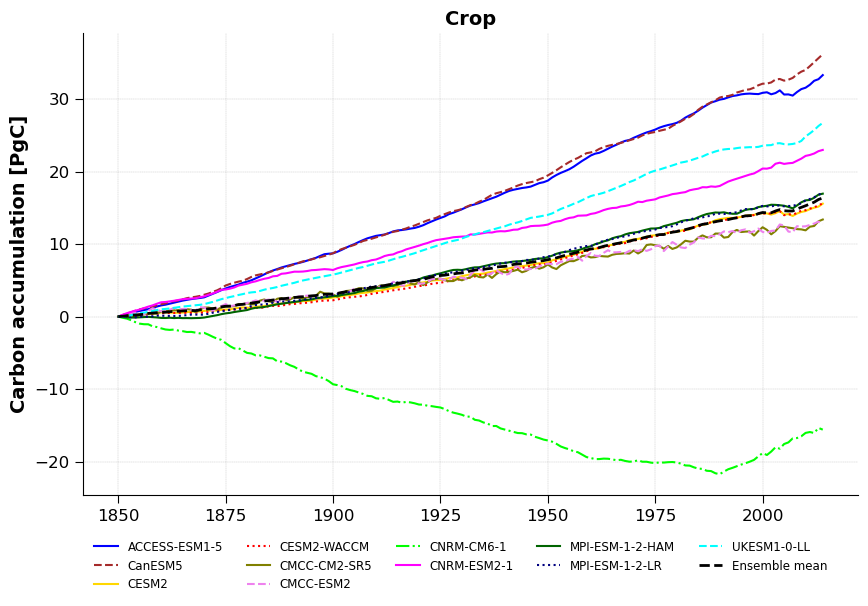

In [350]:
# Plot Total Delta
# Extract columns 0 to 11 (excluding the 'Year' column)
y = crp_df1.iloc[:, 1:12]/10E11
mean = crp_caMean/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Crop', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('crpCarbonAccumulation.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [354]:
#Extract the total natural vegetation carbon content
aces2 = aces['Totnat_Carbon_Content']
caes2 = caes['Totnat_Carbon_Content']
cesm2 = cesm['Totnat_Carbon_Content']
cewa2 = cewa['Totnat_Carbon_Content']
cmcs2 = cmcs['Totnat_Carbon_Content']
cmes2 = cmes['Totnat_Carbon_Content']
cncm2 = cncm['Totnat_Carbon_Content']
cnes2 = cnes['Totnat_Carbon_Content']
mpeh2 = mpeh['Totnat_Carbon_Content']
mpel2 = mpel['Totnat_Carbon_Content']
ukes2 = ukes['Totnat_Carbon_Content']

#Stack them together
nat = np.vstack([aces2, caes2, cesm2, cewa2, cmcs2, cmes2, 
                   cncm2, cnes2, mpeh2, mpel2, ukes2])

#Transpose the column
nat1 = nat.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
nat_df = pd.DataFrame(nat1, columns=column_names)

# calculate the mean carbon content
nat_ccMean = nat_df.mean(axis = 1)

# Insert the mean carbon content
nat_df.insert(11, 'Mean', nat_ccMean)

# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
nat_df1 = nat_df - nat_df.iloc[0]

# Calculate the 5 years mean of the accumulation
nat_df2 = nat_df.groupby(np.arange(len(nat_df))//5).mean()

# 5 years average of 5 years mean of the accumulation
nat_df3 = nat_df2 - nat_df2.iloc[0]

#Insert the year
nat_df.insert(0, 'Year', years) 
nat_df1.insert(0, 'Year', years) 
# save to CSV
# Save the crop carbon content and accumulation DataFrame to a CSV file
nat_df.to_csv('nat_carbonContent.csv', index=False)
nat_df1.to_csv('nat_carbonAccumulation.csv', index=False)

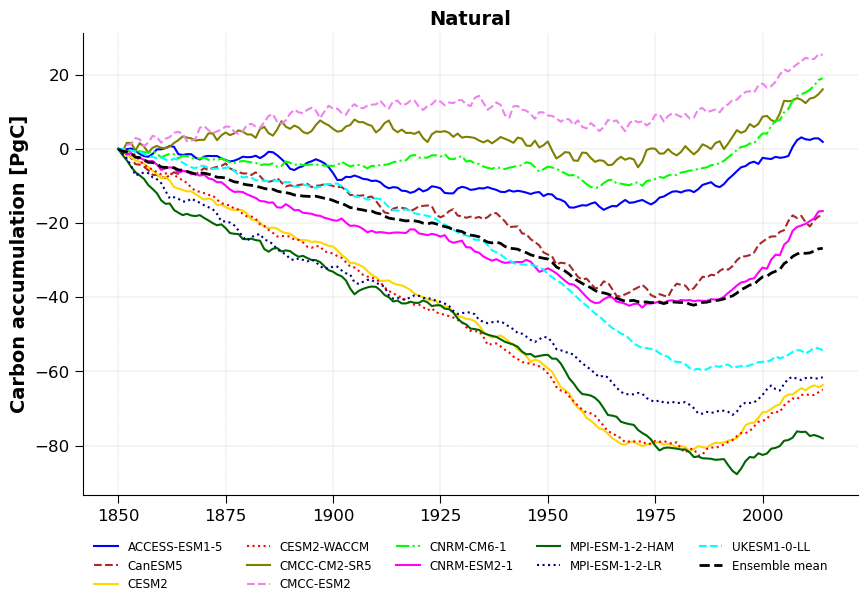

In [355]:
# Plot total natural vegetation carbopn accumulation
# Extract columns 0 to 11 (excluding the 'Year' column)
y = nat_df1.iloc[:, 1:12]/10E11
mean = nat_df1['Mean']/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Natural', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('natCarbonAccumulation.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


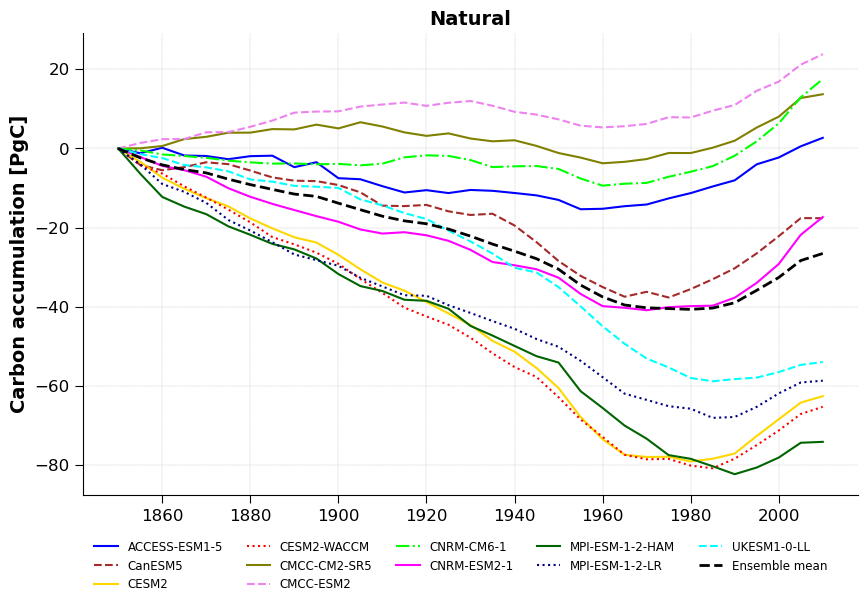

In [377]:
# Plot Natural Accumulation
# Extract columns 1 to 12 (excluding the 'Year' column)

y = nat_df3.iloc[:, 0:11]/10E11
mean = nat_df3['Mean']/10E11
years5 = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years5, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years5, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Natural', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('natCarbonAccumulation5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [62]:
#Extract the total totural vegetation carbon content
aces3 = aces['Tot_Carbon_Content']
caes3 = caes['Tot_Carbon_Content']
cesm3 = cesm['Tot_Carbon_Content']
cewa3 = cewa['Tot_Carbon_Content']
cmcs3 = cmcs['Tot_Carbon_Content']
cmes3 = cmes['Tot_Carbon_Content']
cncm3 = cncm['Tot_Carbon_Content']
cnes3 = cnes['Tot_Carbon_Content']
mpeh3 = mpeh['Tot_Carbon_Content']
mpel3 = mpel['Tot_Carbon_Content']
ukes3 = ukes['Tot_Carbon_Content']

#Stack them together
tot = np.vstack([aces3, caes3, cesm3, cewa3, cmcs3, cmes3, 
                   cncm3, cnes3, mpeh3, mpel3, ukes3])

#Transpose the column
tot1 = tot.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
tot_df = pd.DataFrame(tot1, columns=column_names)

# calculate the mean carbon content
tot_ccMean = tot_df.mean(axis = 1)

# Insert the mean carbon content
tot_df.insert(11, 'Mean', tot_ccMean)

# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
tot_df1 = tot_df - tot_df.iloc[0]

# Calculate the 5 years mean of the accumulation
tot_df2 = tot_df.groupby(np.arange(len(tot_df))//5).mean()

# 5 years average of 5 years mean of the accumulation
tot_df3 = tot_df2 - tot_df2.iloc[0]

#Insert the year
tot_df.insert(0, 'Year', years) 
tot_df1.insert(0, 'Year', years) 
# save to CSV
# Save the crop carbon content and accumulation DataFrame to a CSV file
tot_df.to_csv('tot_carbonContent.csv', index=False)
tot_df1.to_csv('tot_carbonAccumulation.csv', index=False)

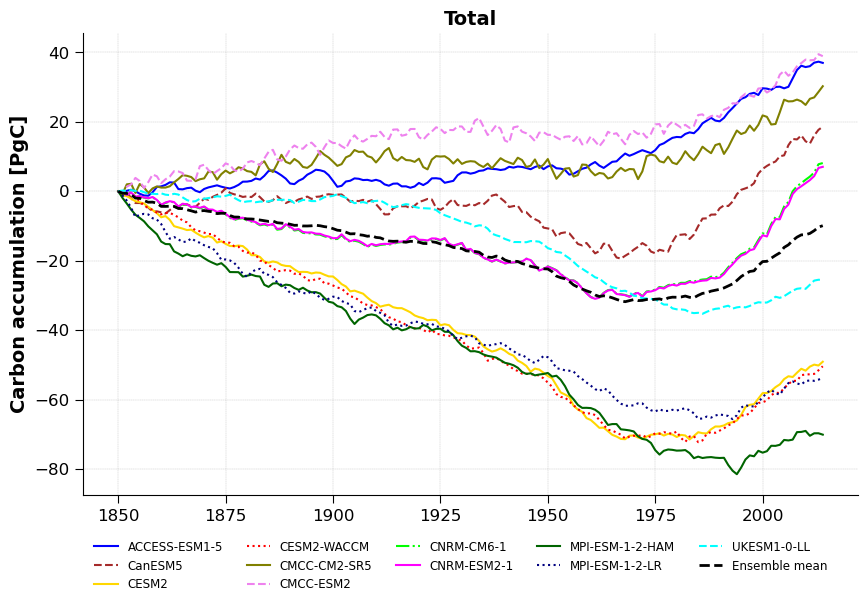

In [63]:
# Plot Total Accumulation
# Extract columns 0 to 11 (excluding the 'Year' column)
y = tot_df1.iloc[:, 1:12]/10E11
mean = tot_df1['Mean']/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Total', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('totCarbonAccumulation.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


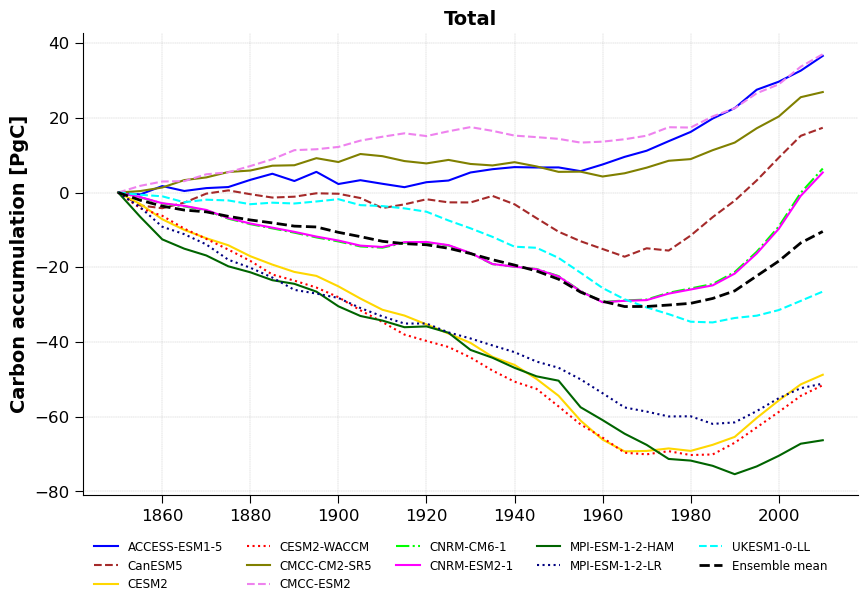

In [378]:
# Plot Total Accumulation
# Extract columns 1 to 12 (excluding the 'Year' column)

y = tot_df3.iloc[:, 0:11]/10E11
mean = tot_df3['Mean']/10E11
years5 = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years5, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years5, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Total', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('totCarbonAccumulation5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [379]:
#Extract the C3 crop carbon content
aces4 = aces['C3crp_Carbon_Content']
caes4 = caes['C3crp_Carbon_Content']
cesm4 = cesm['C3crp_Carbon_Content']
cewa4 = cewa['C3crp_Carbon_Content']
cmcs4 = cmcs['C3crp_Carbon_Content']
cmes4 = cmes['C3crp_Carbon_Content']
cncm4 = cncm['C3crp_Carbon_Content']
cnes4 = cnes['C3crp_Carbon_Content']
mpeh4 = mpeh['C3crp_Carbon_Content']
mpel4 = mpel['C3crp_Carbon_Content']
ukes4 = ukes['C3crp_Carbon_Content']

#Stack them together
crpC3 = np.vstack([aces4, caes4, cesm4, cewa4, cmcs4, cmes4, 
                   cncm4, cnes4, mpeh4, mpel4, ukes4])

#Transpose the column
crpC31 = crpC3.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
crpC3_df = pd.DataFrame(crpC31, columns=column_names)

# calculate the mean carbon content
crpC3_ccMean = crpC3_df.mean(axis = 1)

# Insert the mean carbon content
crpC3_df.insert(11, 'Mean', crpC3_ccMean)

# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
crpC3_df1 = crpC3_df - crpC3_df.iloc[0]

# Calculate the 5 years mean of the accumulation
crpC3_df2 = crpC3_df.groupby(np.arange(len(crpC3_df))//5).mean()

# 5 years average of 5 years mean of the accumulation
crpC3_df3 = crpC3_df2 - crpC3_df2.iloc[0]

#Insert the year
crpC3_df.insert(0, 'Year', years) 
crpC3_df1.insert(0, 'Year', years) 
# save to CSV
# Save the crop carbon content and accumulation DataFrame to a CSV file
crpC3_df.to_csv('crpC3_carbonContent.csv', index=False)
crpC3_df1.to_csv('crpC3_carbonAccumulation.csv', index=False)

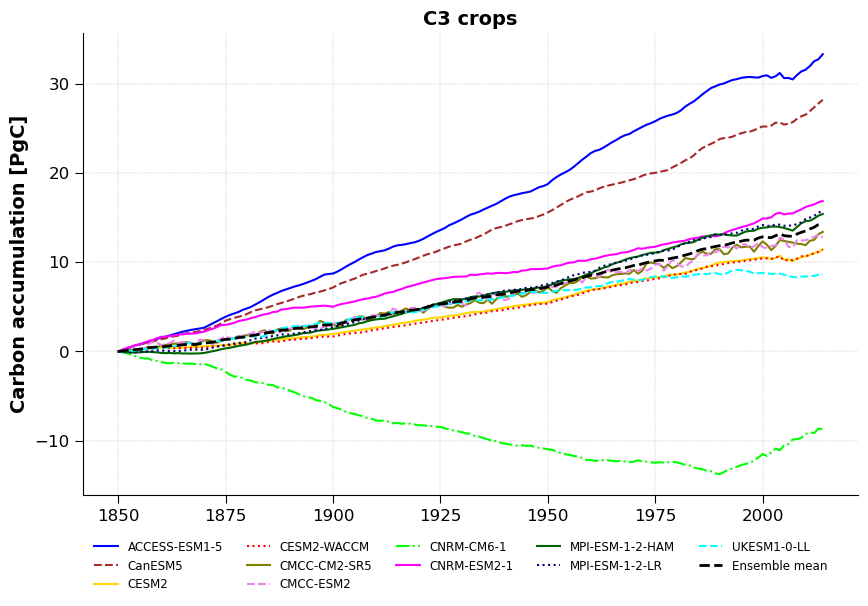

In [380]:
# Plot C3 Crop Carbon accumulation
# Extract columns 0 to 11 (excluding the 'Year' column)
y = crpC3_df1.iloc[:, 1:12]/10E11
mean = crpC3_df1['Mean']/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('C3 crops', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('crpC3CarbonAccumulation.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


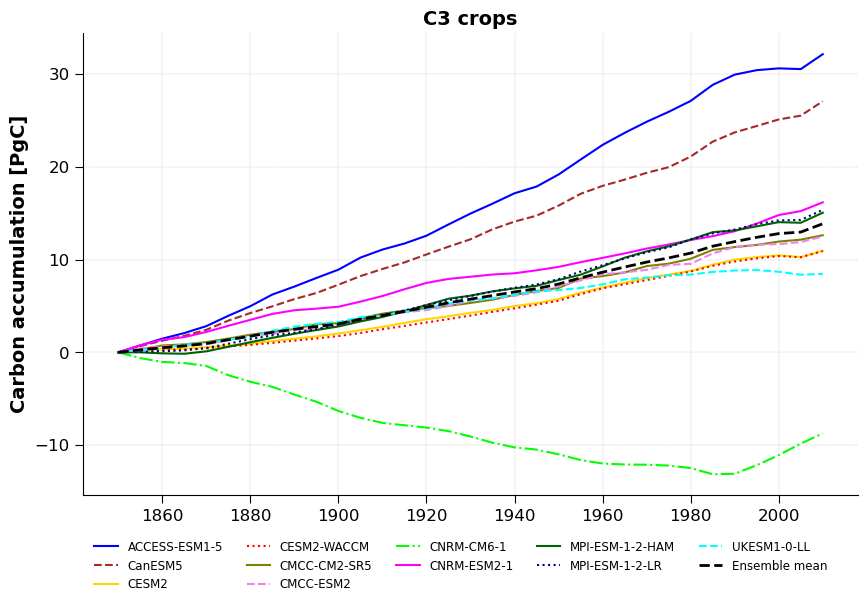

In [381]:
# Plot C3 crop carbon accumulation
# Extract columns 1 to 12 (excluding the 'Year' column)

y = crpC3_df3.iloc[:, 0:11]/10E11
mean = crpC3_df3['Mean']/10E11
years5 = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years5, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years5, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('C3 crops', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('crpC3CarbonAccumulation5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [382]:
#Extract the C4 crop carbon content 
aces4a = aces['C4crp_Carbon_Content']
caes4a = caes['C4crp_Carbon_Content']
cesm4a = cesm['C4crp_Carbon_Content']
cewa4a = cewa['C4crp_Carbon_Content']
cmcs4a = cmcs['C4crp_Carbon_Content']
cmes4a = cmes['C4crp_Carbon_Content']
cncm4a = cncm['C4crp_Carbon_Content']
cnes4a = cnes['C4crp_Carbon_Content']
mpeh4a = mpeh['C4crp_Carbon_Content']
mpel4a = mpel['C4crp_Carbon_Content']
ukes4a = ukes['C4crp_Carbon_Content']

#Stack them together
crpC4 = np.vstack([aces4a, caes4a, cesm4a, cewa4a, cmcs4a, cmes4a, 
                   cncm4a, cnes4a, mpeh4a, mpel4a, ukes4a])

#Transpose the column
crpC41 = crpC4.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
crpC4_df = pd.DataFrame(crpC41, columns=column_names)

# calculate the mean carbon content
crpC4_ccMean = crpC4_df.mean(axis = 1)

# Insert the mean carbon content
crpC4_df.insert(11, 'Mean', crpC4_ccMean)

# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
crpC4_df1 = crpC4_df - crpC4_df.iloc[0]

# Calculate the 5 years mean of the accumulation
crpC4_df2 = crpC4_df.groupby(np.arange(len(crpC4_df))//5).mean()

# 5 years average of 5 years mean of the accumulation
crpC4_df3 = crpC4_df2 - crpC4_df2.iloc[0]

#Insert the year
crpC4_df.insert(0, 'Year', years) 
crpC4_df1.insert(0, 'Year', years) 
# save to CSV
# Save the crop carbon content and accumulation DataFrame to a CSV file
crpC4_df.to_csv('crpC4_carbonContent.csv', index=False)
crpC4_df1.to_csv('crpC4_carbonAccumulation.csv', index=False)

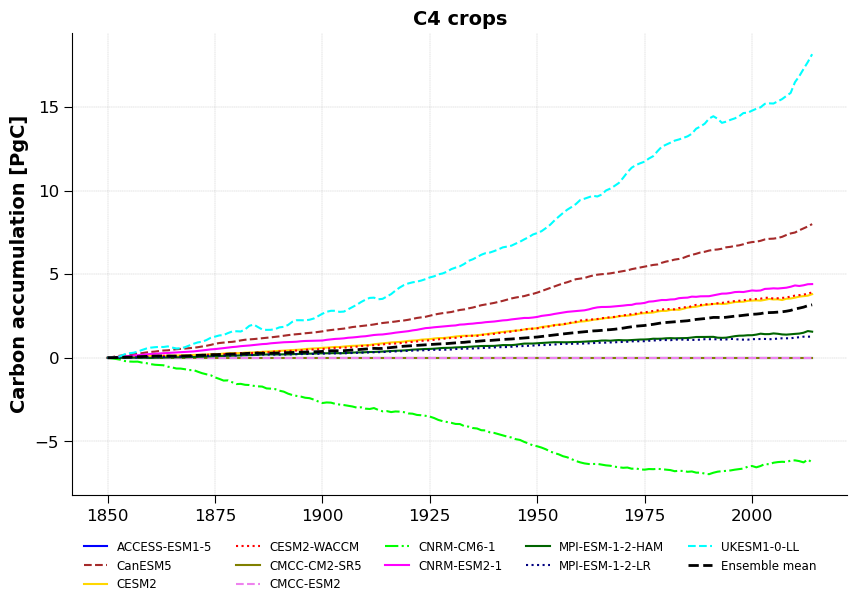

In [383]:
# Plot C4 crop carbon accumulation
# Extract columns 0 to 11 (excluding the 'Year' column)
y = crpC4_df1.iloc[:, 1:12]/10E11
mean = crpC4_df1['Mean']/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('C4 crops', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('crpC4CarbonAccumulation.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


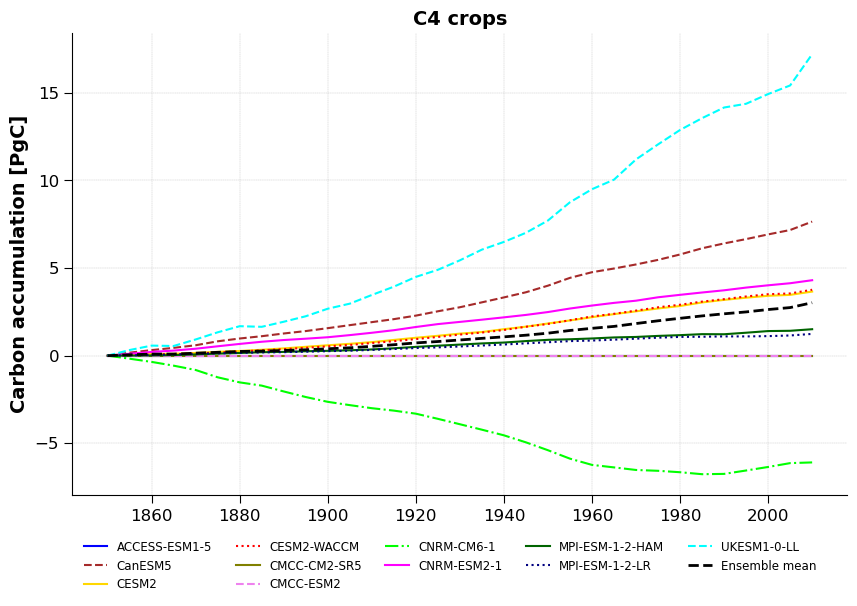

In [384]:
# Plot C4 carbon accumulation data
# Extract columns 1 to 12 (excluding the 'Year' column)

y = crpC4_df3.iloc[:, 0:11]/10E11
mean = crpC4_df3['Mean']/10E11
years5 = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years5, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years5, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('C4 crops', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
#plt.savefig('crpC4CarbonAccumulation5Years.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [385]:
#Extract the C3 natural vegetation carbon content
aces5 = aces['C3nat_Carbon_Content']
caes5 = caes['C3nat_Carbon_Content']
cesm5 = cesm['C3nat_Carbon_Content']
cewa5 = cewa['C3nat_Carbon_Content']
cmcs5 = cmcs['C3nat_Carbon_Content']
cmes5 = cmes['C3nat_Carbon_Content']
cncm5 = cncm['C3nat_Carbon_Content']
cnes5 = cnes['C3nat_Carbon_Content']
mpeh5 = mpeh['C3nat_Carbon_Content']
mpel5 = mpel['C3nat_Carbon_Content']
ukes5 = ukes['C3nat_Carbon_Content']

#Stack them together
natC3 = np.vstack([aces5, caes5, cesm5, cewa5, cmcs5, cmes5, 
                   cncm5, cnes5, mpeh5, mpel5, ukes5])

#Transpose the column
natC31 = natC3.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
natC3_df = pd.DataFrame(natC31, columns=column_names)

# calculate the mean carbon content
natC3_ccMean = natC3_df.mean(axis = 1)

# Insert the mean carbon content
natC3_df.insert(11, 'Mean', natC3_ccMean)

# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
natC3_df1 = natC3_df - natC3_df.iloc[0]

# Calculate the 5 years mean of the accumulation
natC3_df2 = natC3_df.groupby(np.arange(len(natC3_df))//5).mean()

# 5 years average of 5 years mean of the accumulation
natC3_df3 = natC3_df2 - natC3_df2.iloc[0]

#Insert the year
natC3_df.insert(0, 'Year', years) 
natC3_df1.insert(0, 'Year', years) 
# save to CSV
# Save the crop carbon content and accumulation DataFrame to a CSV file
natC3_df.to_csv('natC3_carbonContent.csv', index=False)
natC3_df1.to_csv('natC3_carbonAccumulation.csv', index=False)

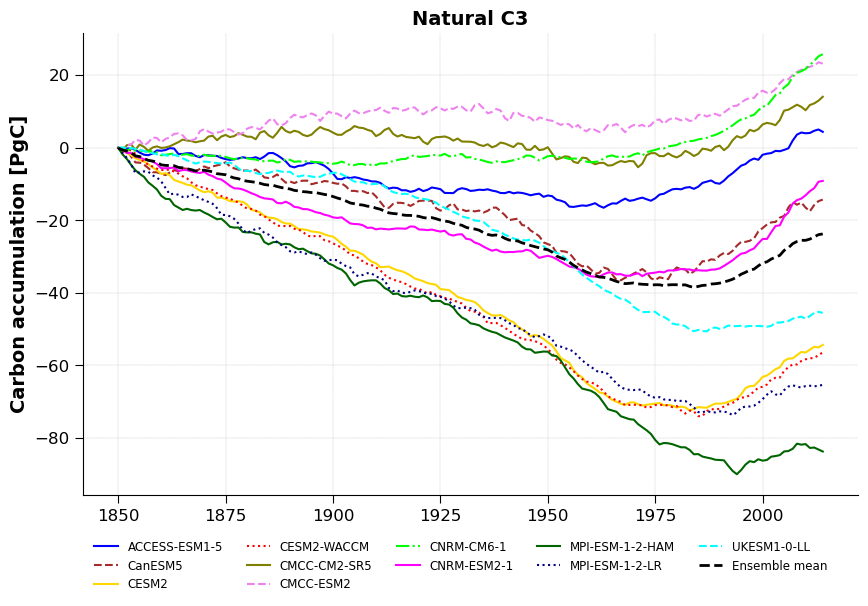

In [386]:
# Plot natural C3 carbon accumulation
# Extract columns 0 to 11 (excluding the 'Year' column)
y = natC3_df1.iloc[:, 1:12]/10E11
mean = natC3_df1['Mean']/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Natural C3', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('natC3CarbonAccumulation.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


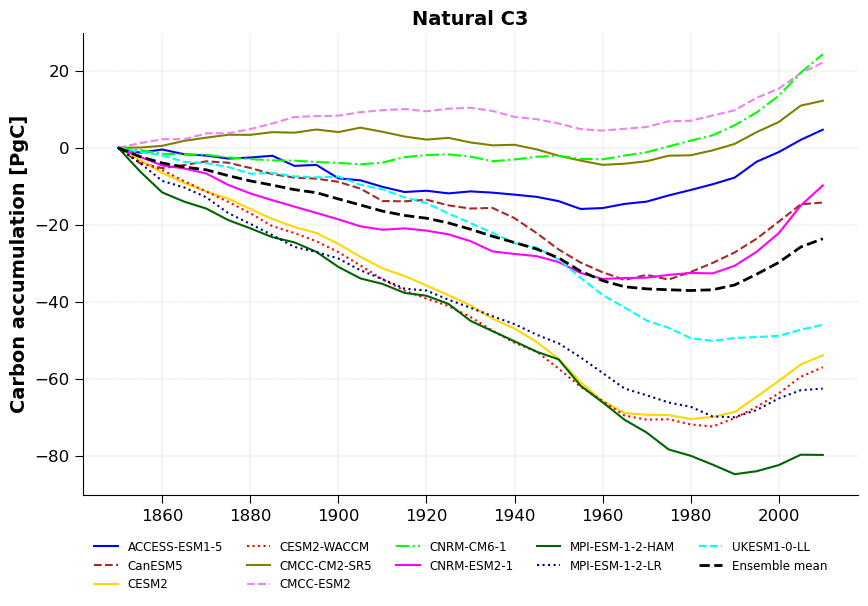

In [387]:
# Plot natural C3 carbon accumulation data
# Extract columns 1 to 12 (excluding the 'Year' column)

y = natC3_df3.iloc[:, 0:11]/10E11
mean = natC3_df3['Mean']/10E11
years5 = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years5, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years5, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Natural C3', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('natC3CarbonAccumulation5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [388]:
#Extract the C4 natural vegetation carbon content
aces5a = aces['C4nat_Carbon_Content']
caes5a = caes['C4nat_Carbon_Content']
cesm5a = cesm['C4nat_Carbon_Content']
cewa5a = cewa['C4nat_Carbon_Content']
cmcs5a = cmcs['C4nat_Carbon_Content']
cmes5a = cmes['C4nat_Carbon_Content']
cncm5a = cncm['C4nat_Carbon_Content']
cnes5a = cnes['C4nat_Carbon_Content']
mpeh5a = mpeh['C4nat_Carbon_Content']
mpel5a = mpel['C4nat_Carbon_Content']
ukes5a = ukes['C4nat_Carbon_Content']

#Stack them together
natC4 = np.vstack([aces5a, caes5a, cesm5a, cewa5a, cmcs5a, cmes5a, 
                   cncm5a, cnes5a, mpeh5a, mpel5a, ukes5a])

#Transpose the column
natC41 = natC4.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
natC4_df = pd.DataFrame(natC41, columns=column_names)

# calculate the mean carbon content
natC4_ccMean = natC4_df.mean(axis = 1)

# Insert the mean carbon content
natC4_df.insert(11, 'Mean', natC4_ccMean)

# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
natC4_df1 = natC4_df - natC4_df.iloc[0]

# Calculate the 5 years mean of the accumulation
natC4_df2 = natC4_df.groupby(np.arange(len(natC4_df))//5).mean()

# 5 years average of 5 years mean of the accumulation
natC4_df3 = natC4_df2 - natC4_df2.iloc[0]

#Insert the year
natC4_df.insert(0, 'Year', years) 
natC4_df1.insert(0, 'Year', years) 
# save to CSV
# Save the crop carbon content and accumulation DataFrame to a CSV file
natC4_df.to_csv('natC4_carbonContent.csv', index=False)
natC4_df1.to_csv('natC4_carbonAccumulation.csv', index=False)

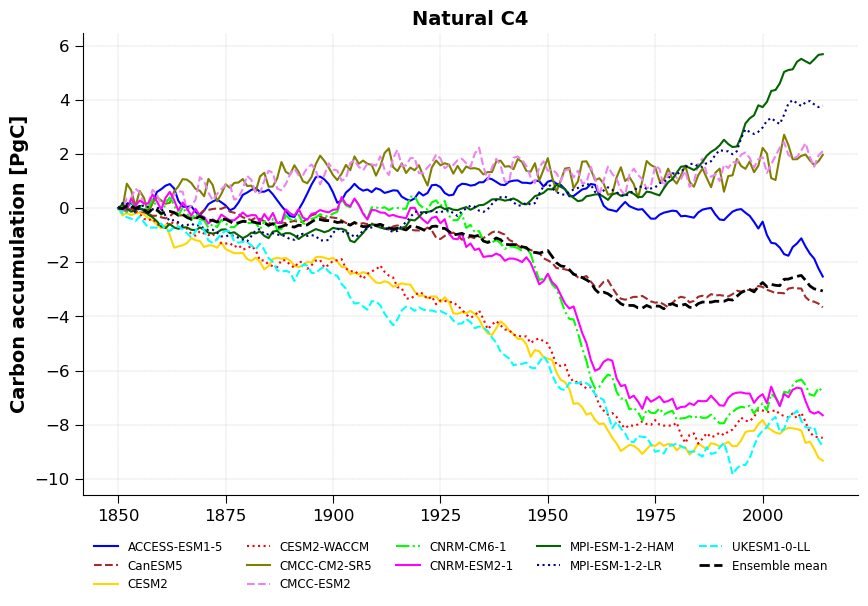

In [389]:
# Plot natural C4 carbon accumulation
# Extract columns 0 to 11 (excluding the 'Year' column)
y = natC4_df1.iloc[:, 1:12]/10E11
mean = natC4_df1['Mean']/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Natural C4', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('natC4CarbonAccumulation.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


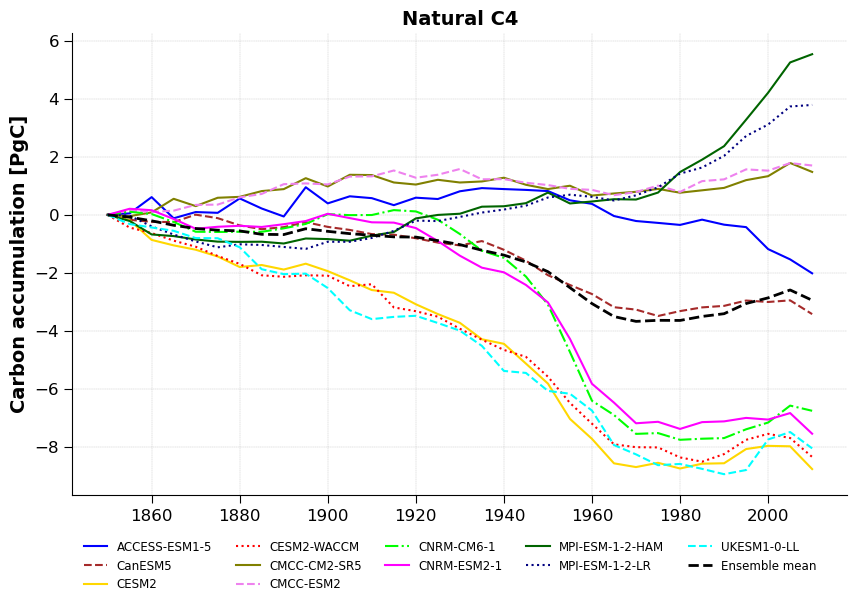

In [390]:
# Plot natural C4 carbon accumulation data
# Extract columns 1 to 12 (excluding the 'Year' column)

y = natC4_df3.iloc[:, 0:11]/10E11
mean = natC4_df3['Mean']/10E11
years5 = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years5, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years5, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('Natural C4', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('natC4CarbonAccumulation5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [391]:
#Extract the C3 vegetation carbon content
aces6 = aces['C3_Carbon_Content']
caes6 = caes['C3_Carbon_Content']
cesm6 = cesm['C3_Carbon_Content']
cewa6 = cewa['C3_Carbon_Content']
cmcs6 = cmcs['C3_Carbon_Content']
cmes6 = cmes['C3_Carbon_Content']
cncm6 = cncm['C3_Carbon_Content']
cnes6 = cnes['C3_Carbon_Content']
mpeh6 = mpeh['C3_Carbon_Content']
mpel6 = mpel['C3_Carbon_Content']
ukes6 = ukes['C3_Carbon_Content']

#Stack them together
C3 = np.vstack([aces6, caes6, cesm6, cewa6, cmcs6, cmes6, 
                   cncm6, cnes6, mpeh6, mpel6, ukes6])


#Transpose the column
C31 = C3.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
C3_df = pd.DataFrame(C31, columns=column_names)

# calculate the mean carbon content
C3_ccMean = C3_df.mean(axis = 1)

# Insert the mean carbon content
C3_df.insert(11, 'Mean', C3_ccMean)

# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
C3_df1 = C3_df - C3_df.iloc[0]

# Calculate the 5 years mean of the accumulation
C3_df2 = C3_df.groupby(np.arange(len(C3_df))//5).mean()

# 5 years average of 5 years mean of the accumulation
C3_df3 = C3_df2 - C3_df2.iloc[0]

#Insert the year
C3_df.insert(0, 'Year', years) 
C3_df1.insert(0, 'Year', years) 
# save to CSV
# Save the crop carbon content and accumulation DataFrame to a CSV file
C3_df.to_csv('C3_carbonContent.csv', index=False)
C3_df1.to_csv('C3_carbonAccumulation.csv', index=False)

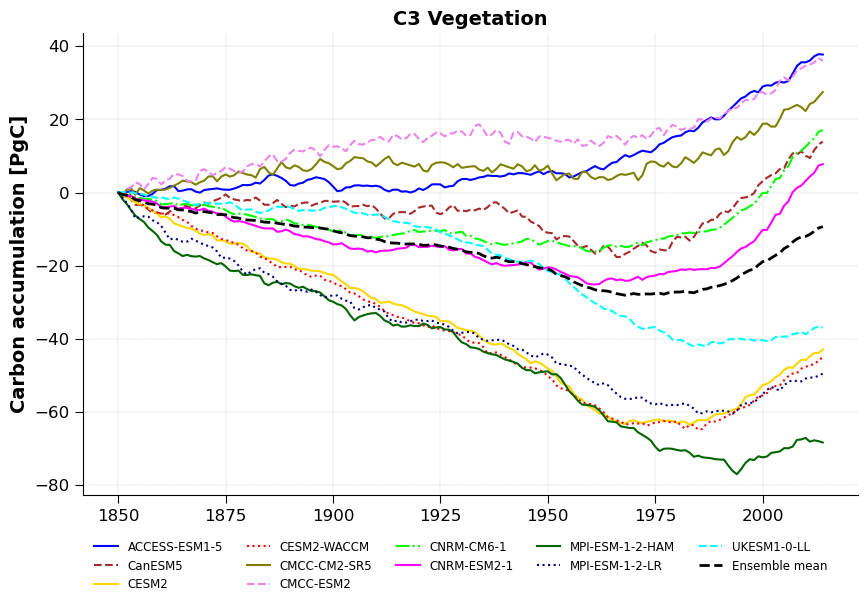

In [392]:
# Plot natural C4 carbon accumulation
# Extract columns 0 to 11 (excluding the 'Year' column)
y = C3_df1.iloc[:, 1:12]/10E11
mean = C3_df1['Mean']/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('C3 Vegetation', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('C3CarbonAccumulation.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


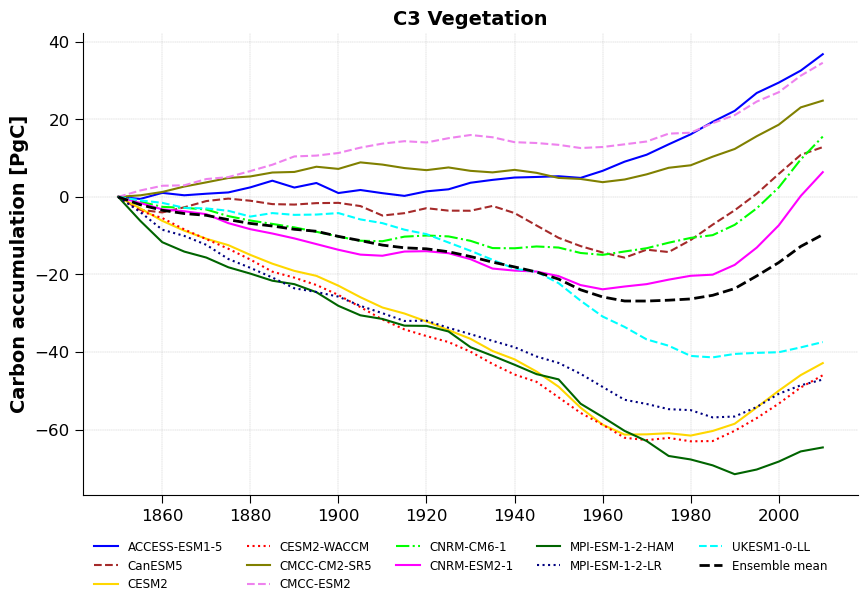

In [393]:
# Plot C3 carbon accumulation data
# Extract columns 1 to 12 (excluding the 'Year' column)

y = C3_df3.iloc[:, 0:11]/10E11
mean = C3_df3['Mean']/10E11
years5 = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years5, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years5, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('C3 Vegetation', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('C3CarbonAccumulation5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [321]:
cmes.head()

Year  C3_Carbon_Content  C3_Carbon_Accumulation  C4_Carbon_Content  \
0  1850       2.958473e+15                     NaN       2.333680e+14   
1  1851       2.958290e+15           -1.833414e+11       2.331640e+14   
2  1852       2.958998e+15            7.081327e+11       2.333511e+14   
3  1853       2.959264e+15            2.668248e+11       2.334236e+14   
4  1854       2.959909e+15            6.442451e+11       2.335421e+14   

   C4_Carbon_Accumulation  Crp_Carbon_Content  Crp_Carbon_Accumulation  \
0                     NaN        1.514235e+14                      NaN   
1           -2.040110e+11        1.525824e+14             1.158970e+12   
2            1.870827e+11        1.539537e+14             1.371286e+12   
3            7.254468e+10        1.552832e+14             1.329477e+12   
4            1.184807e+11        1.566010e+14             1.317783e+12   

   C3crp_Carbon_Content  C3crp_Carbon_Accumulation  C4crp_Carbon_Content  \
0          1.514235e+14                        NaN                   0.0   
1          1.525824e+14               1.158970e+12                   0.0   
2          1.539537e+14               1.371286e+12                   0.0   
3          1.552832e+14               1.329477e+12                   0.0   
4          1.566010e+14               1.317783e+12                   0.0   

   C4crp_Carbon_Accumulation  C3nat_Carbon_Content  C3nat_Carbon_Accumulation  \
0                        NaN          2.807049e+15                        NaN   
1                        0.0          2.805707e+15              -1.342177e+12   
2                        0.0          2.805044e+15              -6.630356e+11   
3                        0.0          2.803981e+15              -1.062736e+12   
4                        0.0          2.803307e+15              -6.737730e+11   

   C4nat_Carbon_Content  C4nat_Carbon_Accumulation  Totnat_Carbon_Content  \
0          2.333680e+14                        NaN           3.040417e+15   
1          2.331640e+14              -2.040110e+11           3.038871e+15   
2          2.333511e+14               1.870827e+11           3.038395e+15   
3          2.334236e+14               7.254468e+10           3.037405e+15   
4          2.335421e+14               1.184807e+11           3.036850e+15   

   Totnat_Carbon_Accumulation  Tot_Carbon_Content  Tot_Carbon_Accumulation  
0                         NaN        3.391195e+15                      NaN  
1               -1.545651e+12        3.390757e+15            -4.378182e+11  
2               -4.764729e+11        3.391612e+15             8.549669e+11  
3               -9.899900e+11        3.392011e+15             3.983582e+11  
4               -5.551245e+11        3.392877e+15             8.665096e+11

In [396]:
#Extract the C4 vegetation carbon content
aces6a = aces['C4_Carbon_Content']
caes6a = caes['C4_Carbon_Content']
cesm6a = cesm['C4_Carbon_Content']
cewa6a = cewa['C4_Carbon_Content']
cmcs6a = cmcs['C4_Carbon_Content']
cmes6a = cmes['C4_Carbon_Content']
cncm6a = cncm['C4_Carbon_Content']
cnes6a = cnes['C4_Carbon_Content']
mpeh6a = mpeh['C4_Carbon_Content']
mpel6a = mpel['C4_Carbon_Content']
ukes6a = ukes['C4_Carbon_Content']

#Stack them together
C4 = np.vstack([aces6a, caes6a, cesm6a, cewa6a, cmcs6a, cmes6a, 
                   cncm6a, cnes6a, mpeh6a, mpel6a, ukes6a])

#Transpose the column
C41 = C4.T

# Create DataFrame with appropriate column names
column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes', 
                'cncm', 'cnes', 'mpeh', 'mpel', 'ukes']
C4_df = pd.DataFrame(C41, columns=column_names)

# calculate the mean carbon content
C4_ccMean = C4_df.mean(axis = 1)

# Insert the mean carbon content
C4_df.insert(11, 'Mean', C4_ccMean)

# Calculate accumulation by subtract the values of the first row 
# from all rows in all the 11 columns
C4_df1 = C4_df - C4_df.iloc[0]

# Calculate the 5 years mean of the accumulation
C4_df2 = C4_df.groupby(np.arange(len(C4_df))//5).mean()

# 5 years average of 5 years mean of the accumulation
C4_df3 = C4_df2 - C4_df2.iloc[0]

#Insert the year
C4_df.insert(0, 'Year', years) 
C4_df1.insert(0, 'Year', years) 
# save to CSV
# Save the crop carbon content and accumulation DataFrame to a CSV file
C4_df.to_csv('C4_carbonContent.csv', index=False)
C4_df1.to_csv('C4_carbonAccumulation.csv', index=False)

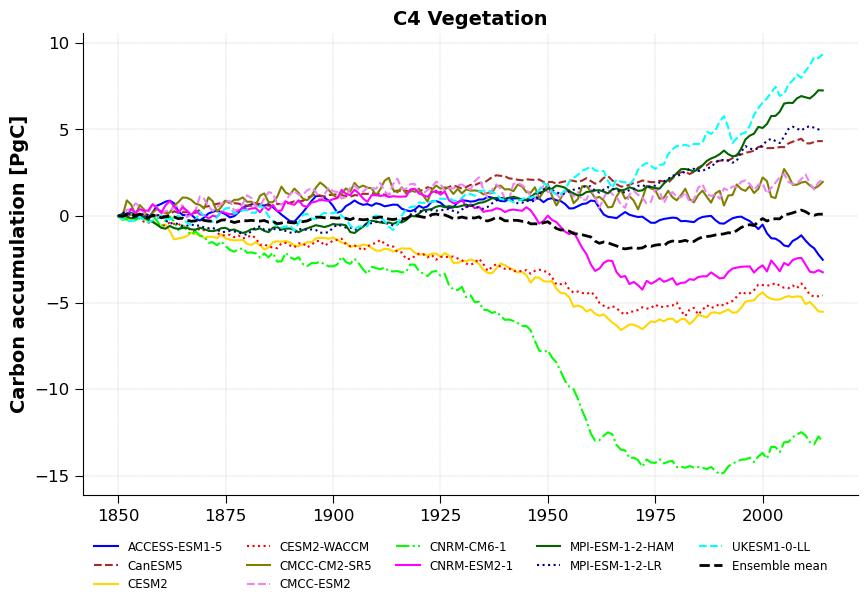

In [397]:
# Plot C4 carbon accumulation
# Extract columns 0 to 11 (excluding the 'Year' column)
y = C4_df1.iloc[:, 1:12]/10E11
mean = C4_df1['Mean']/10E11
years = np.arange(1850, 2015, 1)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('C4 Vegetation', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('C4CarbonAccumulation.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


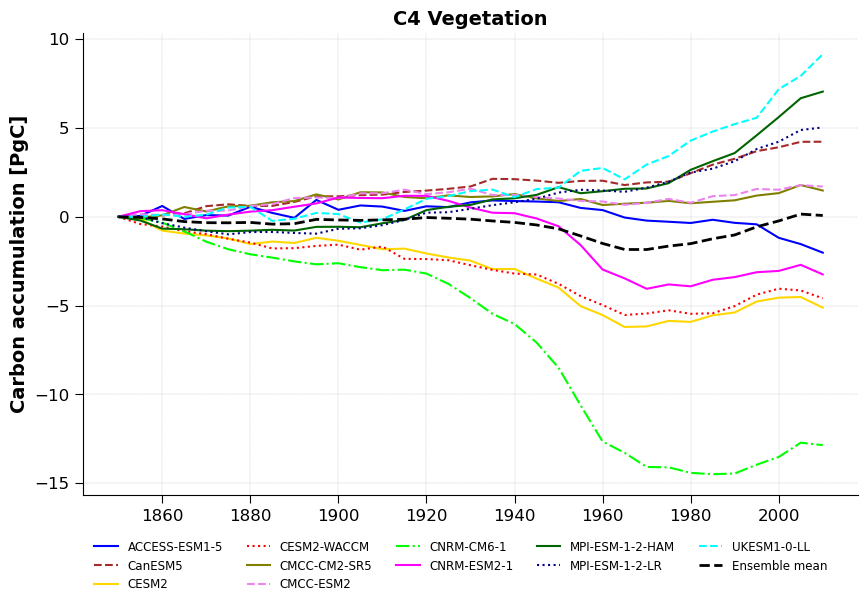

In [446]:
# Plot C4 carbon accumulation data
# Extract columns 1 to 12 (excluding the 'Year' column)

y = C4_df3.iloc[:, 0:11]/10E11
mean = C4_df3['Mean']/10E11
years5 = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years5, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years5, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon accumulation [PgC]', size=14, weight = 'bold')
ax.set_title('C4 Vegetation', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('C4CarbonAccumulation5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


## Make plot of carbon accumulation for all

In [408]:
# define the functionfor the plot
def plot_fig1(ax, years, y, mean):
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet', 'lime',
              'magenta', 'darkgreen', 'navy', 'aqua']
    labels = ['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
              'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-ESM2-1',
              'MPI-ESM-1-2-HAM', 'MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    linestyles = ['-', '--', '-', ':', '-', '--', '-.', '-', '-', ':', '--']

    # Convert DataFrame to numpy array if needed
    if hasattr(y, 'values'):
        y = y.values

    # Transpose if shape is (time, models) instead of (models, time)
    if y.shape[0] != len(labels) and y.shape[1] == len(labels):
        y = y.T

    # Plot each model's line
    for i in range(y.shape[0]):
        ax.plot(years, y[i], label=labels[i], color=colors[i],
                linestyle=linestyles[i], linewidth=2.5)

    # Plot the ensemble mean line
    ax.plot(years, mean, color='black', 
            label='Ensemble mean', linestyle='-', linewidth=2.5)

    return ax


In [411]:
crp_ca5years_accum.head(3)

Year          aces          caes          cesm          cewa          cmcs  \
0   0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1   5.0  7.400588e+11  8.468058e+11  3.143964e+11  1.740970e+11  3.205062e+11   
2  10.0  1.474950e+12  1.572728e+12  4.456376e+11  3.528484e+11  7.446402e+11   

           cmes          cncm          cnes          mpeh          mpel  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1  4.152414e+11 -8.307488e+11  9.319516e+11  7.348800e+09  8.533240e+10   
2  6.333802e+11 -1.445695e+12  1.675625e+12 -9.620600e+10  1.572928e+11   

           ukes          Mean  
0  0.000000e+00  0.000000e+00  
1  5.422068e+11  3.224724e+11  
2  1.017598e+12  5.938908e+11

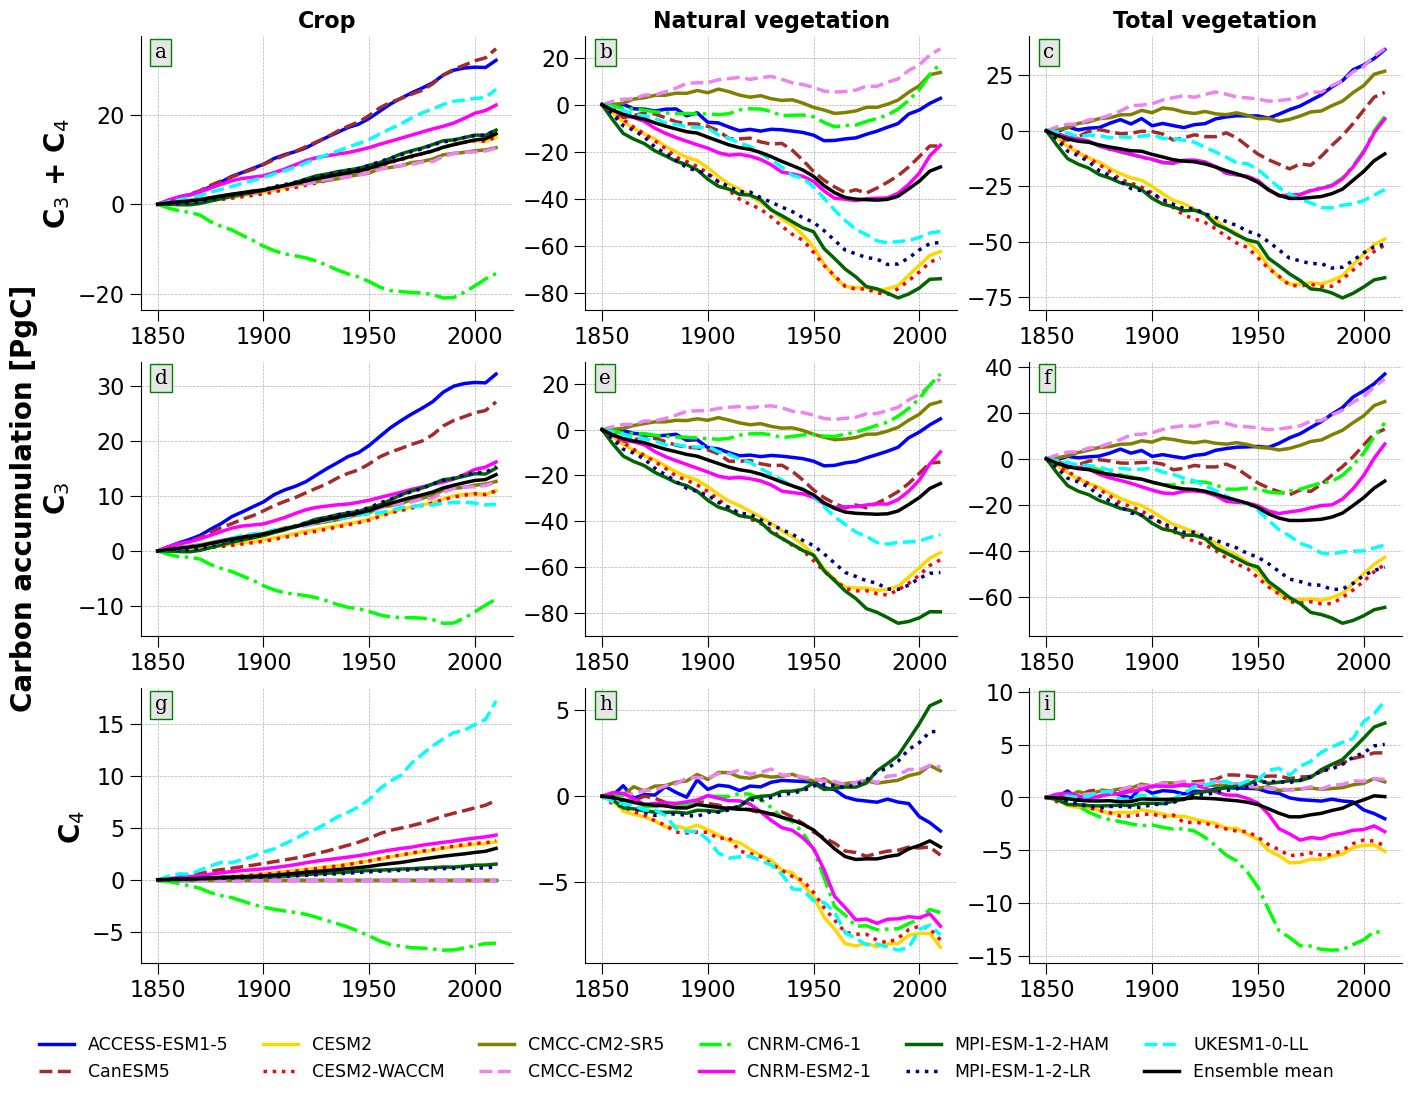

In [417]:
from matplotlib.ticker import MaxNLocator #For ticks adjustment
# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']],
                              figsize=(14, 10), layout="constrained")

years = np.arange(1850, 2015, 5)  # The years for the x-axis

# Plotting the crop on the 'a' axis of the mosaic
plot_fig1(ax=axs['a'], years=years, y=crp_ca5years_accum.iloc[:, 1:12]/10E11, 
         mean=crp_ca5years_accum_mean/10E11)
axs['a'].set_ylabel(r'C$_{3}$ + C$_{4}$', fontsize=20, weight='bold')
axs['a'].set_title('Crop', fontsize=16, weight = 'bold')
axs['a'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)

# Plotting the natural on the 'e' axis of the mosaic
plot_fig1(ax=axs['b'], years=years, y=nat_df3.iloc[:, 0:11]/10E11, 
         mean=nat_df3['Mean']/10E11)
#axs['b'].set_ylim(310, 600)

axs['b'].set_title('Natural vegetation', fontsize=16, weight = 'bold')
axs['b'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['b'].spines['right'].set_visible(False)
axs['b'].spines['top'].set_visible(False)
axs['b'].grid(linestyle='--', linewidth=0.5) 



# Plotting the total on the 'c' axis of the mosaic
plot_fig1(ax=axs['c'], years=years, y=tot_df3.iloc[:, 0:11]/10E11, 
         mean=tot_df3['Mean']/10E11)

axs['c'].set_title('Total vegetation', fontsize=16, weight = 'bold')
axs['c'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['c'].spines['right'].set_visible(False)
axs['c'].spines['top'].set_visible(False)
axs['c'].grid(linestyle='--', linewidth=0.5)
#axs['c'].set_ylim(350, 700)


# Plotting the C3 crops on the 'd' axis of the mosaic
plot_fig1(ax=axs['d'], years=years, y=crpC3_df3.iloc[:, 0:11]/10E11, 
         mean=crpC3_df3['Mean']/10E11)

axs['d'].set_ylabel(r'Carbon accumulation [PgC]' + '\n' + r'C$_{3}$',
                    fontsize=20, weight='bold')
axs['d'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['d'].spines['right'].set_visible(False)
axs['d'].spines['top'].set_visible(False)
axs['d'].grid(linestyle='--', linewidth=0.5) 


# Plotting the C3 natural on the 'e' axis of the mosaic
plot_fig1(ax=axs['e'], years=years, y=natC3_df3.iloc[:, 0:11]/10E11, 
         mean=natC3_df3['Mean']/10E11)
axs['e'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
#axs['e'].set_ylim(55, 80)
axs['e'].spines['right'].set_visible(False)
axs['e'].spines['top'].set_visible(False)
axs['e'].grid(linestyle ='--', linewidth=0.5) 


# Plotting the total C3 on the 'f' axis of the mosaic
plot_fig1(ax=axs['f'], years=years, y=C3_df3.iloc[:, 0:11]/10E11, 
         mean=C3_df3['Mean']/10E11)
#axs['f'].set_ylim(62, 90)
axs['f'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['f'].spines['right'].set_visible(False)
axs['f'].spines['top'].set_visible(False)
axs['f'].grid(linestyle = '--', linewidth=0.5)

# Plotting the C4 crops on the 'g' axis of the mosaic
plot_fig1(ax=axs['g'], years=years, y=crpC4_df3.iloc[:, 0:11]/10E11, 
         mean=crpC4_df3['Mean']/10E11)
#axs['g'].set_ylim(0, 5)

axs['g'].set_ylabel(r'C$_{4}$ ', 
                    fontsize=20, weight = 'bold')
axs['g'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['g'].spines['right'].set_visible(False)
axs['g'].spines['top'].set_visible(False)
axs['g'].grid(linestyle='--', linewidth=0.5) 
    
# Plotting the total on the 'h' axis of the mosaic
plot_fig1(ax=axs['h'], years=years, y=natC4_df3.iloc[:, 0:11]/10E11, 
         mean=natC4_df3['Mean']/10E11)
axs['h'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['h'].spines['right'].set_visible(False)
axs['h'].spines['top'].set_visible(False)
axs['h'].grid(linestyle='--', linewidth=0.5) 
#axs['h'].set_ylim(22, 70)


# Plotting the 3 total on the 'i' axis of the mosaic
plot_fig1(ax=axs['i'], years=years, y=C4_df3.iloc[:, 0:11]/10E11, 
         mean=C4_df3['Mean']/10E11)

axs['i'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['i'].spines['right'].set_visible(False)
axs['i'].spines['top'].set_visible(False)
axs['i'].grid(linestyle='--', linewidth=0.5)

#Make the legend
# Combine handles and labels from the relevant axes for the global legend
handles, labels = [], []
for ax_key in ['c', 'g', 'h', 'i']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'c'
fig.legend(handles, labels, fontsize=12.5, loc='upper left', ncol=6,
           bbox_to_anchor=(0.0125, 0.3, 0.5, -0.315), frameon=False)

import matplotlib.transforms as mtransforms  # Add this line if transforms are needed
from matplotlib.ticker import MaxNLocator #For ticks adjustment

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='x-large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.9', edgecolor='green', pad=3.0))
    
# Save the plot
#plt.savefig('/Users/jo122/CMIP6/2025/PaperFigures_06052025/Veg_Carbon_Accumulation_1850_2014_250623.png', 
            #dpi=500, bbox_inches='tight', pad_inches=0.1)

    
# Show the plot
plt.show()


## Deal with Cland

In [ ]:
cd /path_to/cLand/

In [470]:
#Load all the land carbon content 
aces = pd.read_csv('aces_carbon_content_accumulation_1850_2014.csv')
caes = pd.read_csv('caes_carbon_content_accumulation_1850_2014.csv')
cesm = pd.read_csv('cesm_carbon_content_accumulation_1850_2014.csv')
cewa = pd.read_csv('cewa_carbon_content_accumulation_1850_2014.csv')
cmcs = pd.read_csv('cmcs_carbon_content_accumulation_1850_2014.csv')
cmes = pd.read_csv('cmes_carbon_content_accumulation_1850_2014.csv')
cnes = pd.read_csv('cnes_carbon_content_accumulation_1850_2014.csv')
mpel = pd.read_csv('mpel_carbon_content_accumulation_1850_2014.csv')
mpeh = pd.read_csv('mpeh_carbon_content_accumulation_1850_2014.csv')
ukes = pd.read_csv('ukes_carbon_content_accumulation_1850_2014.csv')
gcb = pd.read_csv('globalCarbonBudget.csv')

In [433]:
aces.head(3)

Year  C3_Carbon_Content  C3_Carbon_Accumulation  C4_Carbon_Content  \
0  1850       1.289409e+15                     NaN       9.334866e+13   
1  1851       1.289281e+15           -1.281779e+11       9.331123e+13   
2  1852       1.289799e+15            5.180804e+11       9.354748e+13   

   C4_Carbon_Accumulation  Crp_Carbon_Content  Crp_Carbon_Accumulation  \
0                     NaN        6.493527e+13                      NaN   
1           -3.743836e+10        6.545010e+13             5.148298e+11   
2            2.362484e+11        6.595389e+13             5.037862e+11   

   C3crp_Carbon_Content  C3crp_Carbon_Accumulation  C4crp_Carbon_Content  \
0          6.493527e+13                        NaN                   0.0   
1          6.545010e+13               5.148298e+11                   0.0   
2          6.595389e+13               5.037862e+11                   0.0   

   C4crp_Carbon_Accumulation  C3nat_Carbon_Content  C3nat_Carbon_Accumulation  \
0                        NaN          1.224473e+15                        NaN   
1                        0.0          1.223830e+15              -6.429029e+11   
2                        0.0          1.223845e+15               1.436130e+10   

   C4nat_Carbon_Content  C4nat_Carbon_Accumulation  Totnat_Carbon_Content  \
0          9.334866e+13                        NaN           1.317822e+15   
1          9.331123e+13              -3.743836e+10           1.317142e+15   
2          9.354748e+13               2.362484e+11           1.317392e+15   

   Totnat_Carbon_Accumulation  Tot_Carbon_Content  Tot_Carbon_Accumulation  
0                         NaN        1.561879e+15                      NaN  
1               -6.804839e+11        1.561650e+15            -2.296465e+11  
2                2.507187e+11        1.562340e+15             6.904160e+11

In [476]:
# define the function to process the data
def process_Carbon_data(aces, caes, cesm, cewa, cmcs, 
                        cmes,cnes, mpeh, mpel, ukes, years,
                        filename_prefix='carbonData'):
    # Stack them together
    df1 = np.vstack([aces, caes, cesm, cewa, cmcs, 
                     cmes, cnes, mpeh, mpel, ukes])

    
    # Transpose the column
    df2 = df1.T

    # Create DataFrame with appropriate column names
    column_names = ['aces', 'caes', 'cesm', 'cewa', 'cmcs', 'cmes',
                    'cnes', 'mpeh', 'mpel', 'ukes']
    df3 = pd.DataFrame(df2, columns=column_names)

    # Calculate the mean carbon content
    df3a = df3.mean(axis=1)

    # Insert the mean carbon content
    df3.insert(10, 'Mean', df3a)

    # Calculate accumulation by subtracting the values of the first row
    df4 = df3 - df3.iloc[0]
    
    # calculating the mean of the accumulation
    df4a = df4.mean(axis=1)

    # Calculate the 5 years mean of the carbon content
    df5 = df3.groupby(np.arange(len(df3)) // 5).mean()

    # Calculate the accumulation of the 5 years mean 
    df6 = df5 - df5.iloc[0]
    
    # Calculate the mean of the 5 years accumulation
    df6a = df6.mean(axis = 1)

    # Insert the year
    df3.insert(0, 'Year', years)
    df4.insert(0, 'Year', years)

    # Save to CSV with custom prefix
    df3.to_csv(f'{filename_prefix}_carbonContent.csv', index=False)
    df4.to_csv(f'{filename_prefix}_carbonAccumulation.csv', index=False)

    return df3, df6


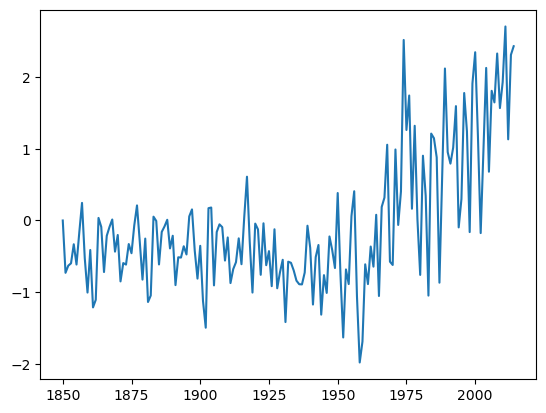

In [472]:
plt.plot(gcb['Year'], gcb['net_land_sink'])
plt.show()

In [495]:
# Extract the cropland carbon content  data

aces1 = aces['Crp_Carbon_Content']
caes1 = caes['Crp_Carbon_Content']
cesm1 = cesm['Crp_Carbon_Content']
cewa1 = cewa['Crp_Carbon_Content']
cmcs1 = cmcs['Crp_Carbon_Content']
cmes1 = cmes['Crp_Carbon_Content']
cnes1 = cnes['Crp_Carbon_Content']
mpeh1 = mpeh['Crp_Carbon_Content']
mpel1 = mpel['Crp_Carbon_Content']
ukes1 = ukes['Crp_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
crp3, crp6 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='croPLand')

In [478]:
crp3.head(2)

Year          aces          caes          cesm          cewa          cmcs  \
0  1850  6.493527e+13  1.014152e+14  4.806174e+13  4.954163e+13  1.515093e+14   
1  1851  6.545010e+13  1.022877e+14  4.835272e+13  4.987767e+13  1.528029e+14   

           cmes          cnes          mpeh          mpel          ukes  \
0  1.514235e+14  1.078501e+14  5.583302e+13  5.403501e+13  7.526532e+13   
1  1.525824e+14  1.088232e+14  5.632728e+13  5.454175e+13  7.533623e+13   

           Mean  
0  8.598701e+13  
1  8.663821e+13

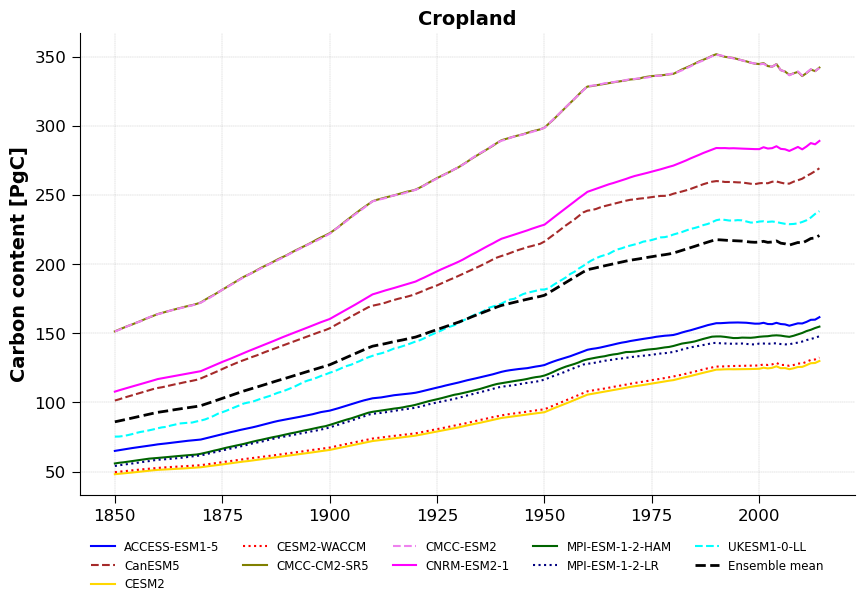

In [496]:
# Plot Cropland carbon content
# Extract columns 1 to 12 (excluding the 'Year' column)

y = crp3.iloc[:, 1:11]/10E11
mean = crp3['Mean']/10E11
years = crp3['Year']

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon content [PgC]', size=14, weight = 'bold')
ax.set_title('Cropland', size=14, weight = 'bold')
ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('CrplandCarbonContent5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


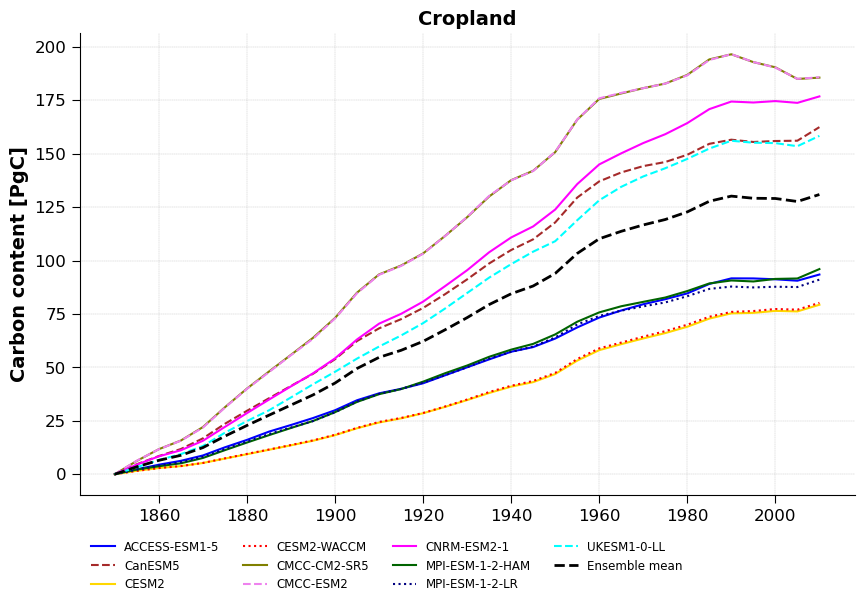

In [542]:
# Plot Cropland carbon content
# Extract columns 1 to 12 (excluding the 'Year' column)

y = crp6.iloc[:, 0:10]/10E11
mean = crp6['Mean']/10E11
years = np.arange(1850, 2015, 5)

# Define plotting parameters
labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
        'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-ESM2-1',
        'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
linestyles = ['-', '--', '-', ':', '-', '--', '-', '-', ':', '--']
colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet',
          'magenta', 'darkgreen', 'navy', 'aqua']
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each series
for i in range(y.shape[1]):
    ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
            linestyle=linestyles[i % len(linestyles)], color=colors[i])
plt.plot(years, mean, linewidth = 2, ls = '--',
         color = 'black', label ='Ensemble mean')

# Add labels, legend, and title
#ax.set_xlabel('Year')
ax.set_ylabel('Carbon content [PgC]', size=14, weight = 'bold')
ax.set_title('Cropland', size=14, weight = 'bold')
ax.legend(ncol=4, loc='upper left', frameon= False, fontsize = 8.5, 
                bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis = 'both', labelsize=12, size=6)


ax.grid(linestyle='--', linewidth=0.25)

#Save the plot
plt.savefig('CrplandCarbonAccumulation5Years.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)


# Display the plot
plt.show()


In [543]:
# Extract the Natural land carbon content  data

aces1 = aces['Totnat_Carbon_Content']
caes1 = caes['Totnat_Carbon_Content']
cesm1 = cesm['Totnat_Carbon_Content']
cewa1 = cewa['Totnat_Carbon_Content']
cmcs1 = cmcs['Totnat_Carbon_Content']
cmes1 = cmes['Totnat_Carbon_Content']
cnes1 = cnes['Totnat_Carbon_Content']
mpeh1 = mpeh['Totnat_Carbon_Content']
mpel1 = mpel['Totnat_Carbon_Content']
ukes1 = ukes['Totnat_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
nat3, nat6 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='natLand')

In [579]:
# Define the plotting function
def plot_carbon_content(y, mean, years, title, filename):
    
    # Define plotting parameters
    labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
            'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-ESM2-1',
            'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    
    # define line styles
    linestyles = ['-', '--', '-', ':', '-', '--', '-', '-', ':', '--']
    
    # Define colours
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet',
              'magenta', 'darkgreen', 'navy', 'aqua']
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each series
    for i in range(y.shape[1]):
        ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
                linestyle=linestyles[i % len(linestyles)], color=colors[i])
    
    # Plot the mean   
    plt.plot(years, mean, linewidth = 2, ls = '--',
             color = 'black', label ='Ensemble mean')
    
    # Add labels, legend, grid and title
    #ax.set_xlabel('Year')
    ax.set_ylabel('Carbon content [PgC]', size=14, weight = 'bold')
    ax.set_title(title, size=14, weight = 'bold')
    ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
              bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis = 'both', labelsize=12, size=6)


    ax.grid(linestyle='--', linewidth=0.25)

    #Save the plot
    plt.savefig(filename, 
                dpi=500, bbox_inches='tight', pad_inches=0.1)
    
    # Display the plot
    plt.show()

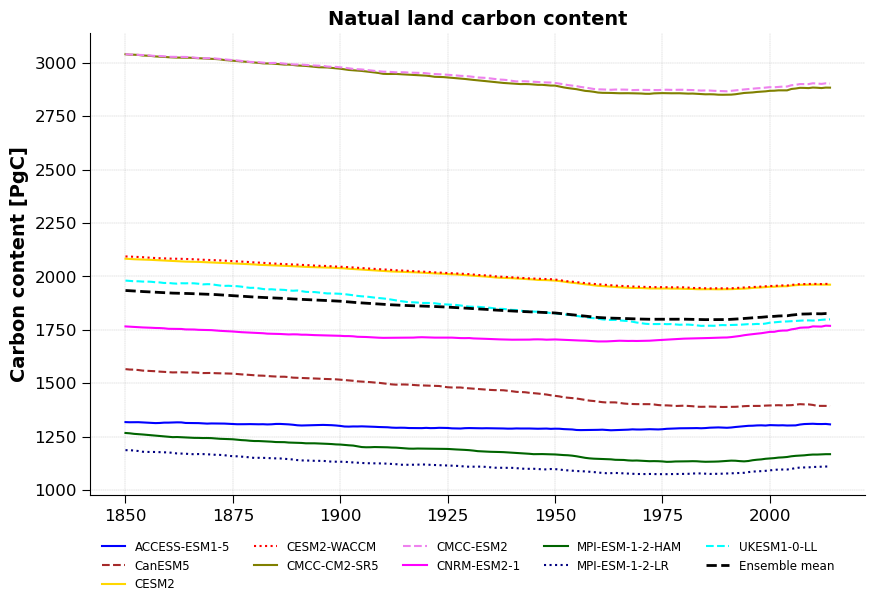

In [580]:
y = nat3.iloc[:, 1:11]/10E11
mean = nat3['Mean']/10E11
years = nat3['Year']


plot_carbon_content(y, mean, years, 
                    title= 'Natual land carbon content', 
                    filename = 'naturalLandCarbonContent5Years.png')


In [548]:
# Define the plotting function
def plot_carbon_accumulation(y, mean, years, title, filename):
    
    # Define plotting parameters
    labels=['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 
            'CESM2-WACCM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-ESM2-1',
            'MPI-ESM-1-2-HAM','MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    
    # define line styles
    linestyles = ['-', '--', '-', ':', '-', '--', '-', '-', ':', '--']
    
    # Define colours
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet',
              'magenta', 'darkgreen', 'navy', 'aqua']
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each series
    for i in range(y.shape[1]):
        ax.plot(years, y.iloc[:, i], linewidth=1.5, label=labels[i],
                linestyle=linestyles[i % len(linestyles)], color=colors[i])
    
    # Plot the mean   
    plt.plot(years, mean, linewidth = 2, ls = '--',
             color = 'black', label ='Ensemble mean')
    
    # Add labels, legend, grid and title
    #ax.set_xlabel('Year')
    ax.set_ylabel('Carbon content [PgC]', size=14, weight = 'bold')
    ax.set_title(title, size=14, weight = 'bold')
    ax.legend(ncol=5, loc='upper left', frameon= False, fontsize = 8.5, 
              bbox_to_anchor=(0.001, 0.3, 0.5, -0.375))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(axis = 'both', labelsize=12, size=6)


    ax.grid(linestyle='--', linewidth=0.25)

    #Save the plot
    plt.savefig(filename, dpi=500, bbox_inches='tight', pad_inches=0.1)
    
    # Display the plot
    plt.show()

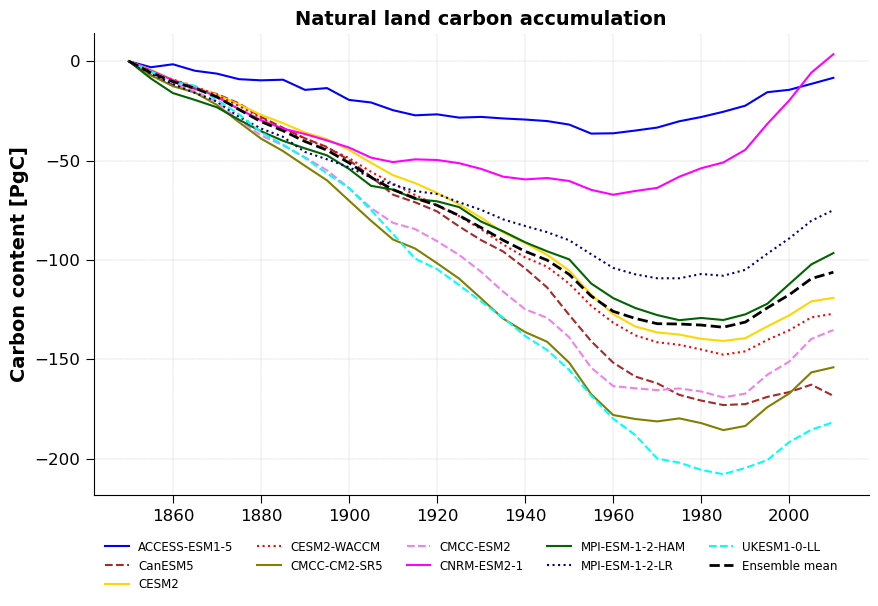

In [569]:
y = nat6.iloc[:, 0:10]/10E11
mean = nat6['Mean']/10E11
years = np.arange(1850, 2015, 5)

plot_carbon_accumulation(y, mean, years, 
                         title='Natural land carbon accumulation', 
                         filename='naturalLandCarbonAccumulation5Years.png')


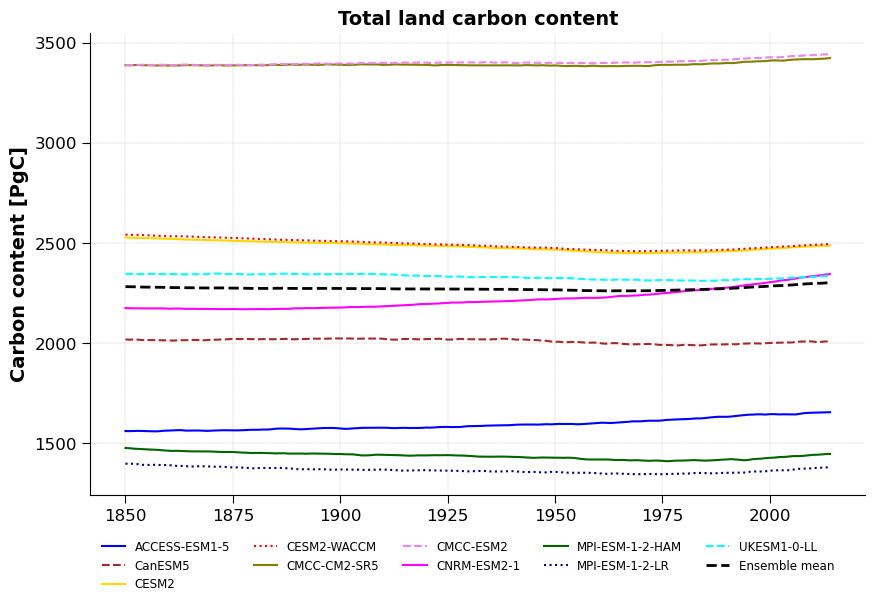

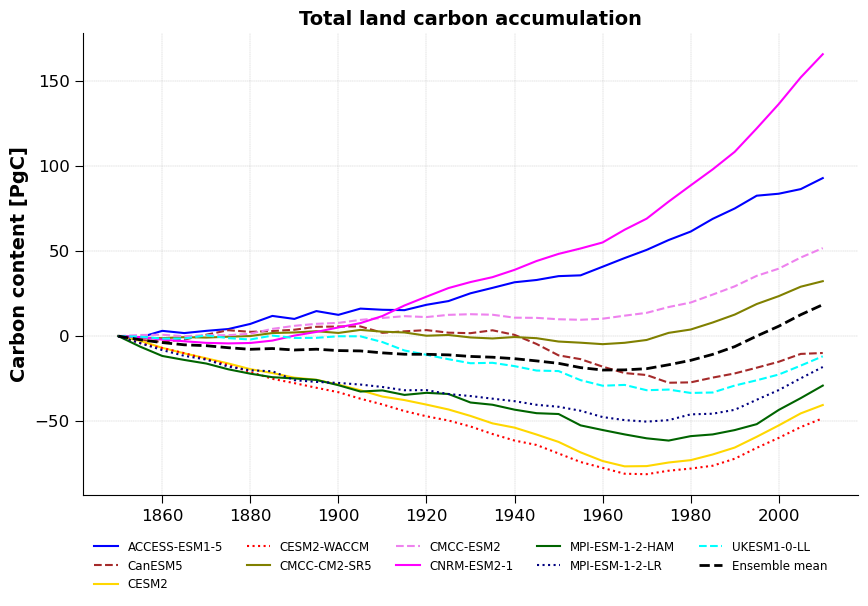

In [594]:
# Extract the total land carbon content  data

aces1 = aces['Tot_Carbon_Content']
caes1 = caes['Tot_Carbon_Content']
cesm1 = cesm['Tot_Carbon_Content']
cewa1 = cewa['Tot_Carbon_Content']
cmcs1 = cmcs['Tot_Carbon_Content']
cmes1 = cmes['Tot_Carbon_Content']
cnes1 = cnes['Tot_Carbon_Content']
mpeh1 = mpeh['Tot_Carbon_Content']
mpel1 = mpel['Tot_Carbon_Content']
ukes1 = ukes['Tot_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
tot3, tot6 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='totLand')


# Plot the carbon content
y = tot3.iloc[:, 1:11]/10E11
mean = tot3['Mean']/10E11
years = tot3['Year']
plot_carbon_content(y, mean, years, 
                    title= 'Total land carbon content', 
                    filename = 'TotalLandCarbonContent5Years.png')


# Plot the carbon accumulation
y = tot6.iloc[:, 0:10]/10E11
mean = tot6['Mean']/10E11
years = np.arange(1850, 2015, 5)
plot_carbon_accumulation(y, mean, years, 
                         title='Total land carbon accumulation', 
                         filename='TotalLandCarbonAccumulation5Years.png')


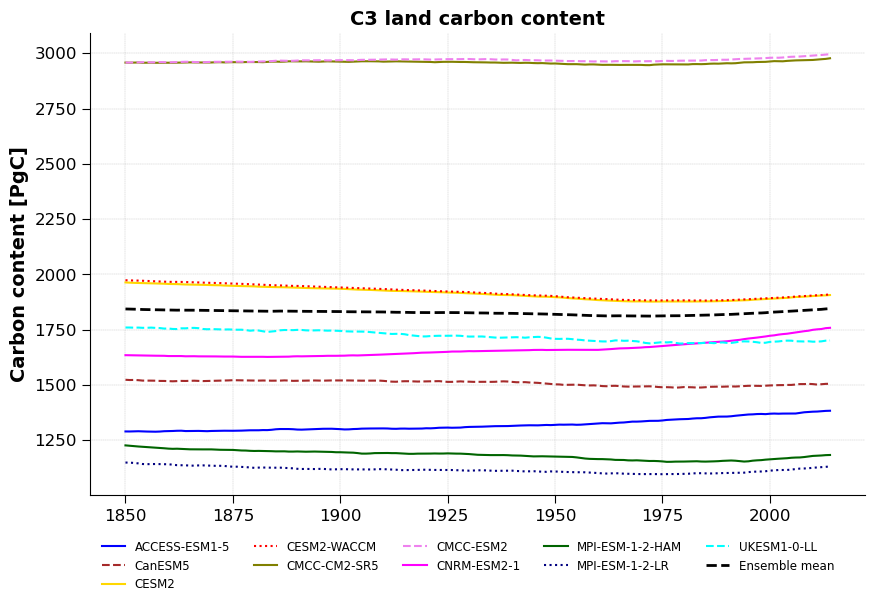

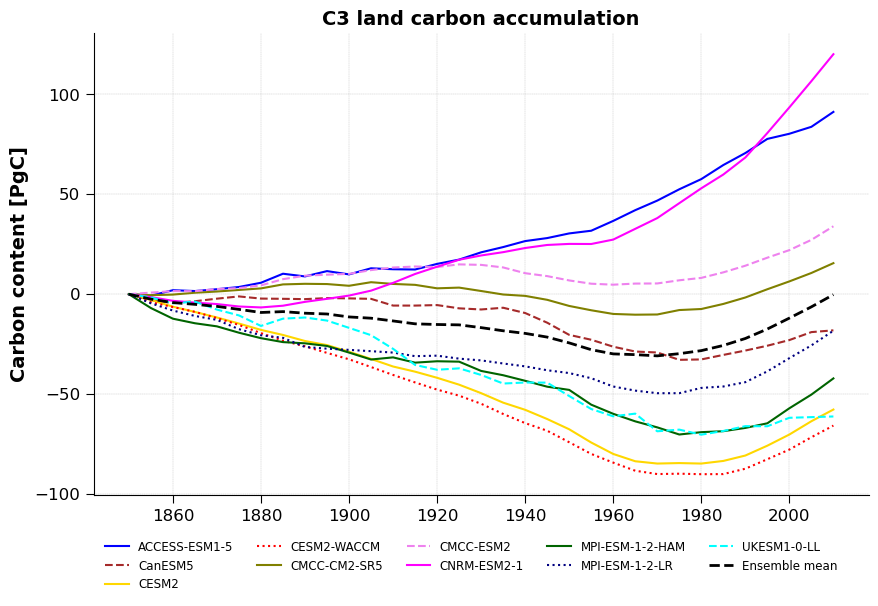

In [593]:
# Extract the C3 land carbon content  data

aces1 = aces['C3_Carbon_Content']
caes1 = caes['C3_Carbon_Content']
cesm1 = cesm['C3_Carbon_Content']
cewa1 = cewa['C3_Carbon_Content']
cmcs1 = cmcs['C3_Carbon_Content']
cmes1 = cmes['C3_Carbon_Content']
cnes1 = cnes['C3_Carbon_Content']
mpeh1 = mpeh['C3_Carbon_Content']
mpel1 = mpel['C3_Carbon_Content']
ukes1 = ukes['C3_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
C33, C36 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='C3Land')

# Plot the carbon content
y = C33.iloc[:, 1:11]/10E11
mean = C33['Mean']/10E11
years = C33['Year']
plot_carbon_content(y, mean, years, 
                    title= 'C3 land carbon content', 
                    filename = 'C3LandCarbonContent5Years.png')


# Plot the carbon accumulation
y = C36.iloc[:, 0:10]/10E11
mean = C36['Mean']/10E11
years = np.arange(1850, 2015, 5)
plot_carbon_accumulation(y, mean, years, 
                         title='C3 land carbon accumulation', 
                         filename='C3LandCarbonAccumulation5Years.png')


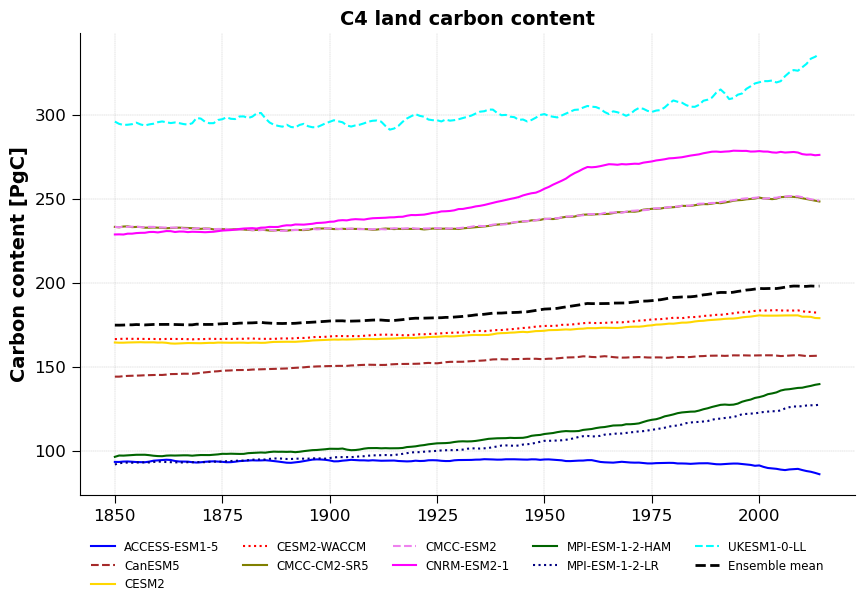

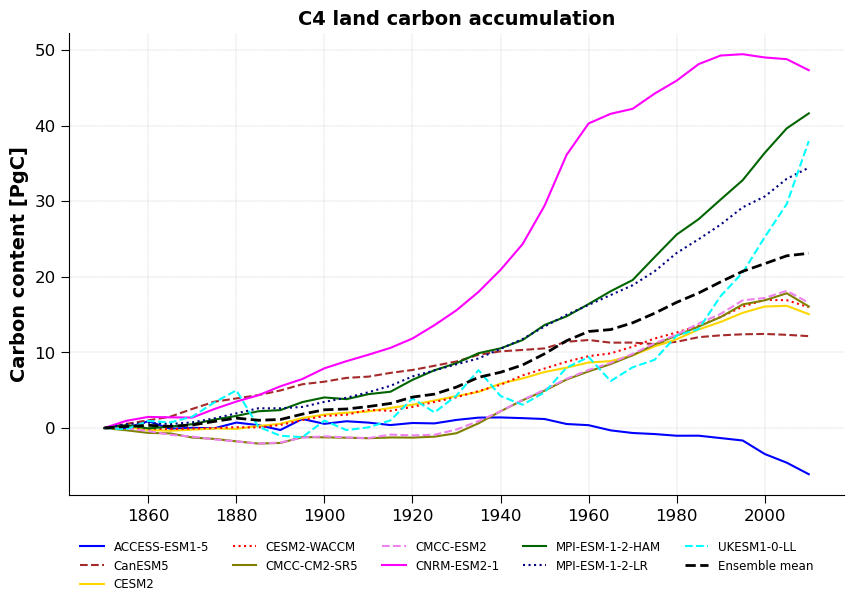

In [584]:
# Extract the C4 land carbon content  data

aces1 = aces['C4_Carbon_Content']
caes1 = caes['C4_Carbon_Content']
cesm1 = cesm['C4_Carbon_Content']
cewa1 = cewa['C4_Carbon_Content']
cmcs1 = cmcs['C4_Carbon_Content']
cmes1 = cmes['C4_Carbon_Content']
cnes1 = cnes['C4_Carbon_Content']
mpeh1 = mpeh['C4_Carbon_Content']
mpel1 = mpel['C4_Carbon_Content']
ukes1 = ukes['C4_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
C43, C46 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='C4Land')

# Plot the carbon content
y = C43.iloc[:, 1:11]/10E11
mean = C43['Mean']/10E11
years = C43['Year']


plot_carbon_content(y, mean, years, 
                    title= 'C4 land carbon content', 
                    filename = 'C4LandCarbonContent5Years.png')

# Plot the carbon accumulation
y = C46.iloc[:, 0:10]/10E11
mean = C46['Mean']/10E11
years = np.arange(1850, 2015, 5)
plot_carbon_accumulation(y, mean, years, 
                         title='C4 land carbon accumulation', 
                         filename='C4LandCarbonAccumulation5Years.png')


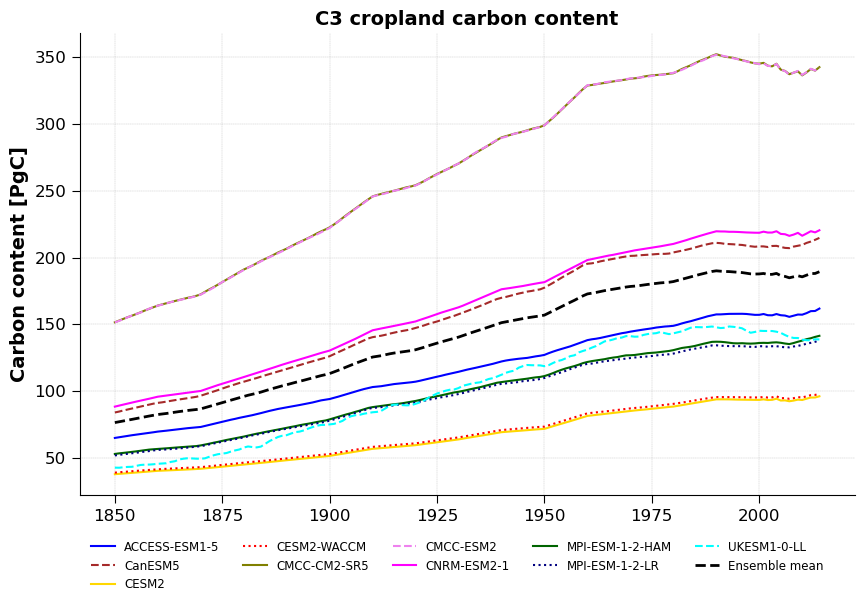

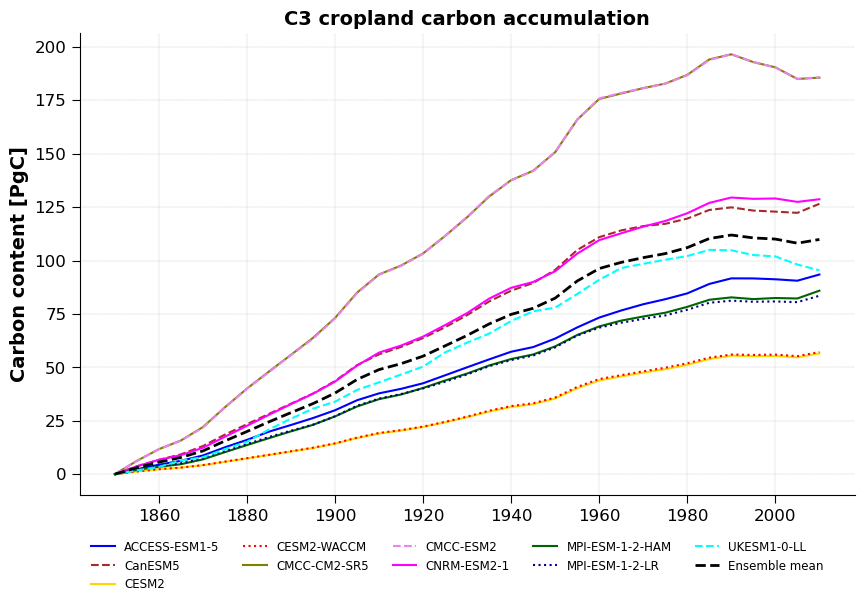

In [588]:
# Extract the C3crp land carbon content  data

aces1 = aces['C3crp_Carbon_Content']
caes1 = caes['C3crp_Carbon_Content']
cesm1 = cesm['C3crp_Carbon_Content']
cewa1 = cewa['C3crp_Carbon_Content']
cmcs1 = cmcs['C3crp_Carbon_Content']
cmes1 = cmes['C3crp_Carbon_Content']
cnes1 = cnes['C3crp_Carbon_Content']
mpeh1 = mpeh['C3crp_Carbon_Content']
mpel1 = mpel['C3crp_Carbon_Content']
ukes1 = ukes['C3crp_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
C3crp3, C3crp6 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='C3crpLand')

# Plot the carbon content
y = C3crp3.iloc[:, 1:11]/10E11
mean = C3crp3['Mean']/10E11
years = C3crp3['Year']


plot_carbon_content(y, mean, years, 
                    title= 'C3 cropland carbon content', 
                    filename = 'C3crpLandCarbonContent5Years.png')

# Plot the carbon accumulation
y = C3crp6.iloc[:, 0:10]/10E11
mean = C3crp6['Mean']/10E11
years = np.arange(1850, 2015, 5)
plot_carbon_accumulation(y, mean, years, 
                         title='C3 cropland carbon accumulation', 
                         filename='C3crpLandCarbonAccumulation5Years.png')


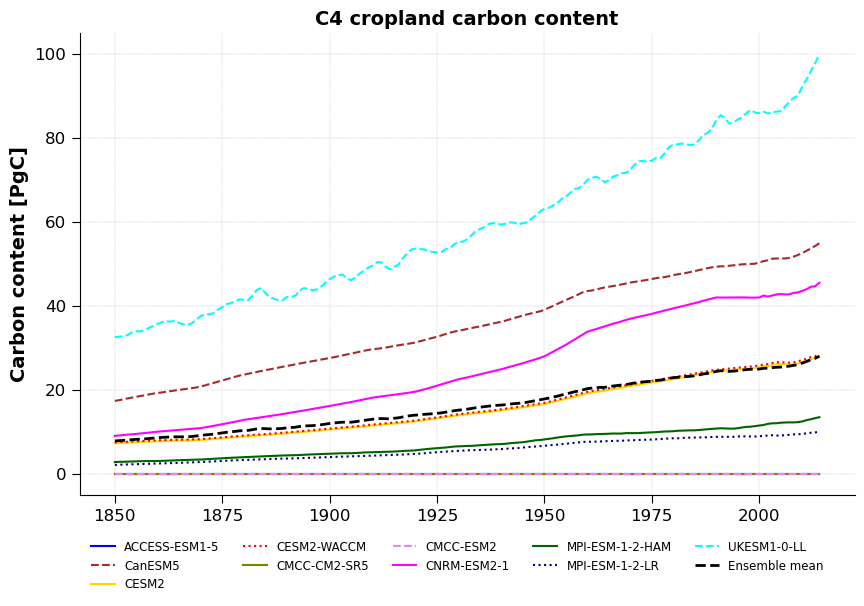

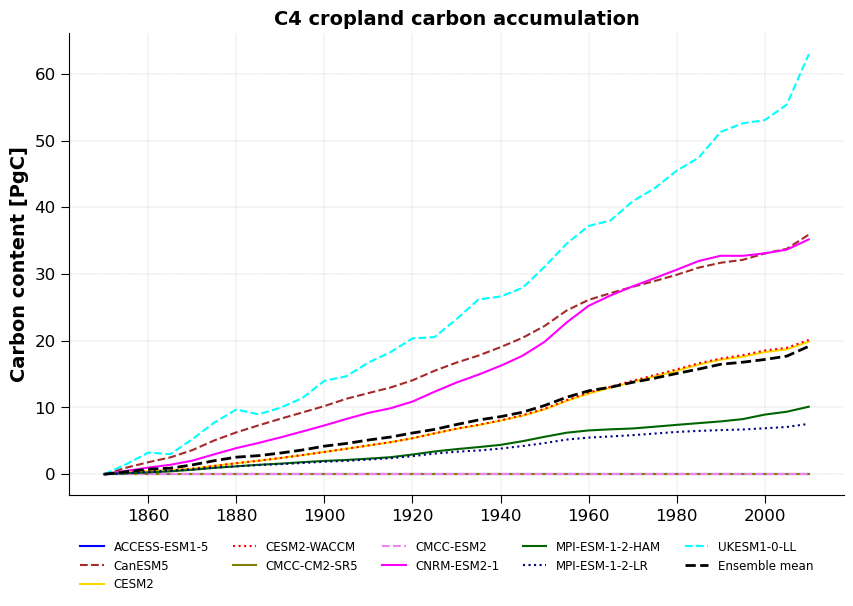

In [589]:
# Extract the C4crp land carbon content  data

aces1 = aces['C4crp_Carbon_Content']
caes1 = caes['C4crp_Carbon_Content']
cesm1 = cesm['C4crp_Carbon_Content']
cewa1 = cewa['C4crp_Carbon_Content']
cmcs1 = cmcs['C4crp_Carbon_Content']
cmes1 = cmes['C4crp_Carbon_Content']
cnes1 = cnes['C4crp_Carbon_Content']
mpeh1 = mpeh['C4crp_Carbon_Content']
mpel1 = mpel['C4crp_Carbon_Content']
ukes1 = ukes['C4crp_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
C4crp3, C4crp6 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='C4crpLand')

# Plot the carbon content
y = C4crp3.iloc[:, 1:11]/10E11
mean = C4crp3['Mean']/10E11
years = C4crp3['Year']


plot_carbon_content(y, mean, years, 
                    title= 'C4 cropland carbon content', 
                    filename = 'C4crpLandCarbonContent5Years.png')

# Plot the carbon accumulation
y = C4crp6.iloc[:, 0:10]/10E11
mean = C4crp6['Mean']/10E11
years = np.arange(1850, 2015, 5)
plot_carbon_accumulation(y, mean, years, 
                         title='C4 cropland carbon accumulation', 
                         filename='C4crpLandCarbonAccumulation5Years.png')


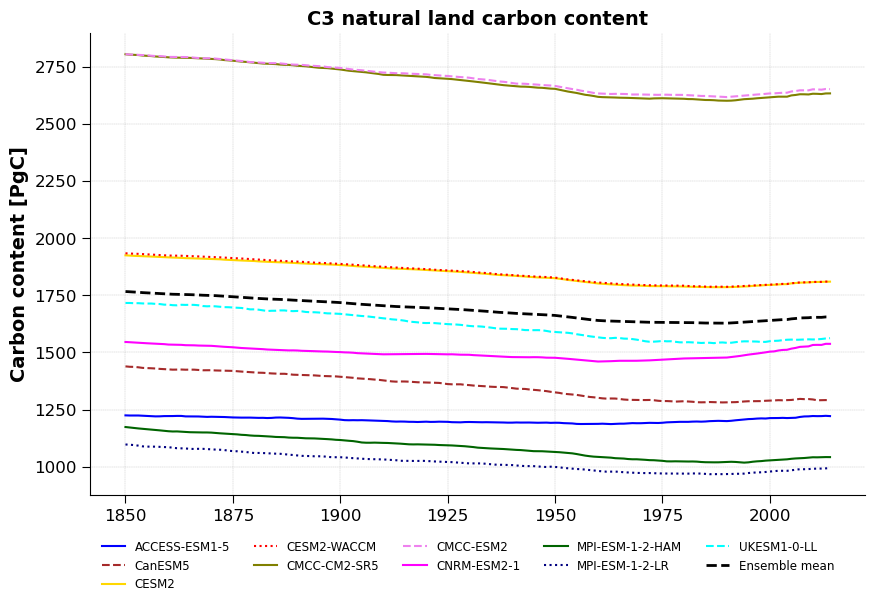

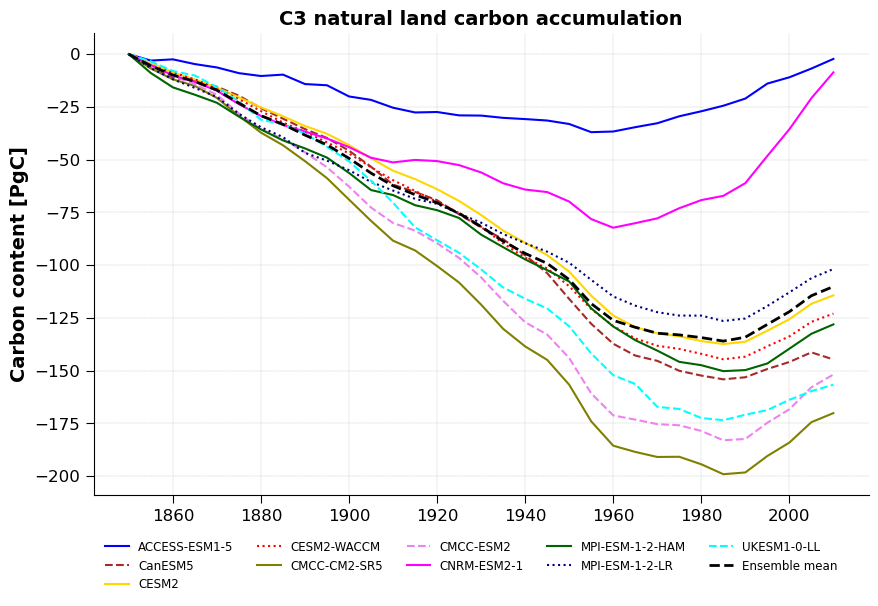

In [590]:
# Extract the C3nat land carbon content  data

aces1 = aces['C3nat_Carbon_Content']
caes1 = caes['C3nat_Carbon_Content']
cesm1 = cesm['C3nat_Carbon_Content']
cewa1 = cewa['C3nat_Carbon_Content']
cmcs1 = cmcs['C3nat_Carbon_Content']
cmes1 = cmes['C3nat_Carbon_Content']
cnes1 = cnes['C3nat_Carbon_Content']
mpeh1 = mpeh['C3nat_Carbon_Content']
mpel1 = mpel['C3nat_Carbon_Content']
ukes1 = ukes['C3nat_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
C3nat3, C3nat6 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='C3natLand')

# Plot the carbon content
y = C3nat3.iloc[:, 1:11]/10E11
mean = C3nat3['Mean']/10E11
years = C3nat3['Year']


plot_carbon_content(y, mean, years, 
                    title= 'C3 natural land carbon content', 
                    filename = 'C3natLandCarbonContent5Years.png')

# Plot the carbon accumulation
y = C3nat6.iloc[:, 0:10]/10E11
mean = C3nat6['Mean']/10E11
years = np.arange(1850, 2015, 5)
plot_carbon_accumulation(y, mean, years, 
                         title='C3 natural land carbon accumulation', 
                         filename='C3natLandCarbonAccumulation5Years.png')


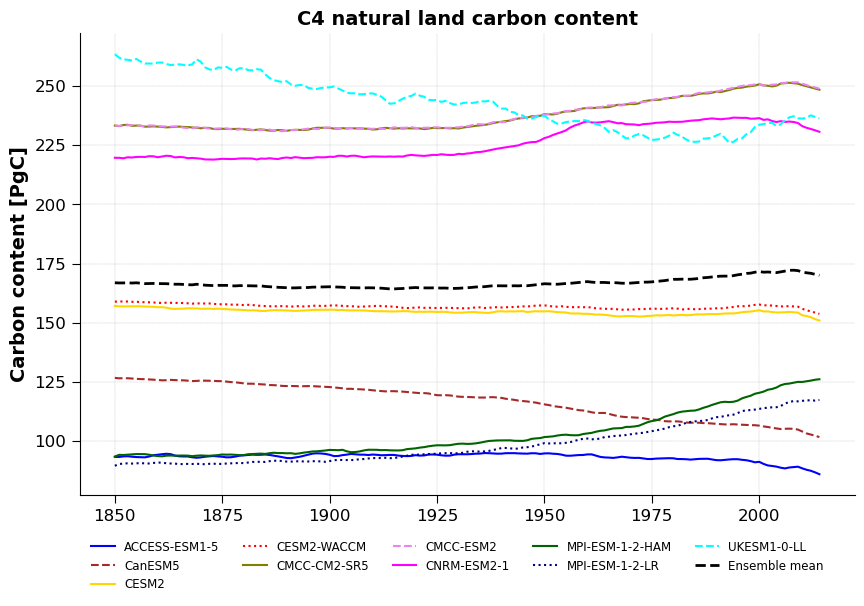

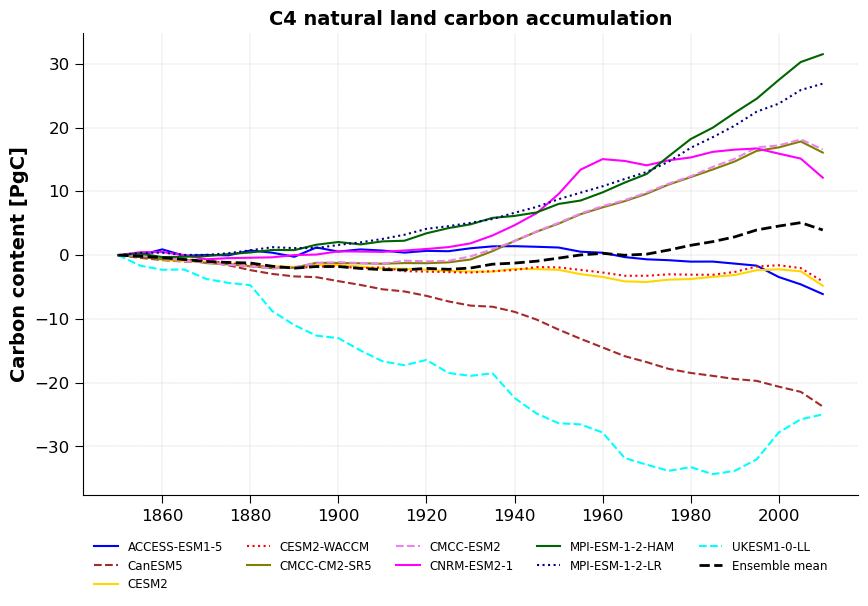

In [591]:
# Extract the C4nat land carbon content  data

aces1 = aces['C4nat_Carbon_Content']
caes1 = caes['C4nat_Carbon_Content']
cesm1 = cesm['C4nat_Carbon_Content']
cewa1 = cewa['C4nat_Carbon_Content']
cmcs1 = cmcs['C4nat_Carbon_Content']
cmes1 = cmes['C4nat_Carbon_Content']
cnes1 = cnes['C4nat_Carbon_Content']
mpeh1 = mpeh['C4nat_Carbon_Content']
mpel1 = mpel['C4nat_Carbon_Content']
ukes1 = ukes['C4nat_Carbon_Content']

# Define years
years = np.arange(1850, 2015, 1)

# 3 = carbon content df
# 6 = The accumulation of the 5 years mean 
# 6a = The mean of the 5 years accumulation

# Apply the function
C4nat3, C4nat6 = process_Carbon_data(aces1, caes1, cesm1, cewa1, cmcs1, cmes1, 
                                 cnes1, mpeh1, mpel1, ukes1, years, 
                                 filename_prefix='C4natLand')

# Plot the carbon content
y = C4nat3.iloc[:, 1:11]/10E11
mean = C4nat3['Mean']/10E11
years = C4nat3['Year']


plot_carbon_content(y, mean, years, 
                    title= 'C4 natural land carbon content', 
                    filename = 'C4natLandCarbonContent5Years.png')

# Plot the carbon accumulation
y = C4nat6.iloc[:, 0:10]/10E11
mean = C4nat6['Mean']/10E11
years = np.arange(1850, 2015, 5)
plot_carbon_accumulation(y, mean, years, 
                         title='C4 natural land carbon accumulation', 
                         filename='C4natLandCarbonAccumulation5Years.png')


In [592]:
ls

aces_carbon_content_accumulation_1850_2014.csv
C3crpLand_carbonAccumulation.csv
C3crpLand_carbonContent.csv
C3crpLandCarbonAccumulation5Years.png
C3crpLandCarbonContent5Years.png
C3Land_carbonAccumulation.csv
C3Land_carbonContent.csv
C3LandCarbonAccumulation5Years.png
C3LandCarbonContent5Years.png
C3natLand_carbonAccumulation.csv
C3natLand_carbonContent.csv
C3natLandCarbonAccumulation5Years.png
C3natLandCarbonContent5Years.png
C4CarbonAccumulation5Years.png
C4crpLand_carbonAccumulation.csv
C4crpLand_carbonContent.csv
C4crpLandCarbonAccumulation5Years.png
C4crpLandCarbonContent5Years.png
C4Land_carbonAccumulation.csv
C4Land_carbonContent.csv
C4LandCarbonAccumulation5Years.png
C4LandCarbonContent5Years.png
C4natLand_carbonAccumulation.csv
C4natLand_carbonContent.csv
C4natLandCarbonAccumulation5Years.png
C4natLandCarbonContent5Years.png
caes_carbon_content_accumulation_1850_2014.csv
carbon_content-accumulation_1850-2014_cLand.png
cesm_carbon_content_accumulation_1850_2014.csv
cewa_carbon_

## Make plot for all land carbon accumulation

In [617]:
# define the functionfor the plot
def plot_figca(ax, years, y, mean):
    colors = ['blue', 'brown', 'gold', 'red', 'olive', 'violet',
              'magenta', 'darkgreen', 'navy', 'aqua']
    labels = ['ACCESS-ESM1-5', 'CanESM5', 'CESM2', 'CESM2-WACCM', 
              'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-ESM2-1',
              'MPI-ESM-1-2-HAM', 'MPI-ESM-1-2-LR', 'UKESM1-0-LL']
    linestyles = ['-', '--', '-', ':', '-', '--', '-', '-', ':', '--']

    # Convert DataFrame to numpy array if needed
    if hasattr(y, 'values'):
        y = y.values

    # Transpose if shape is (time, models) instead of (models, time)
    if y.shape[0] != len(labels) and y.shape[1] == len(labels):
        y = y.T

    # Plot each model's line
    for i in range(y.shape[0]):
        ax.plot(years, y[i], label=labels[i], color=colors[i],
                linestyle=linestyles[i], linewidth=2.5)

    # Plot the ensemble mean line
    ax.plot(years, mean, color='black', 
            label='Ensemble mean', linestyle='--', linewidth=2.5)

    return ax


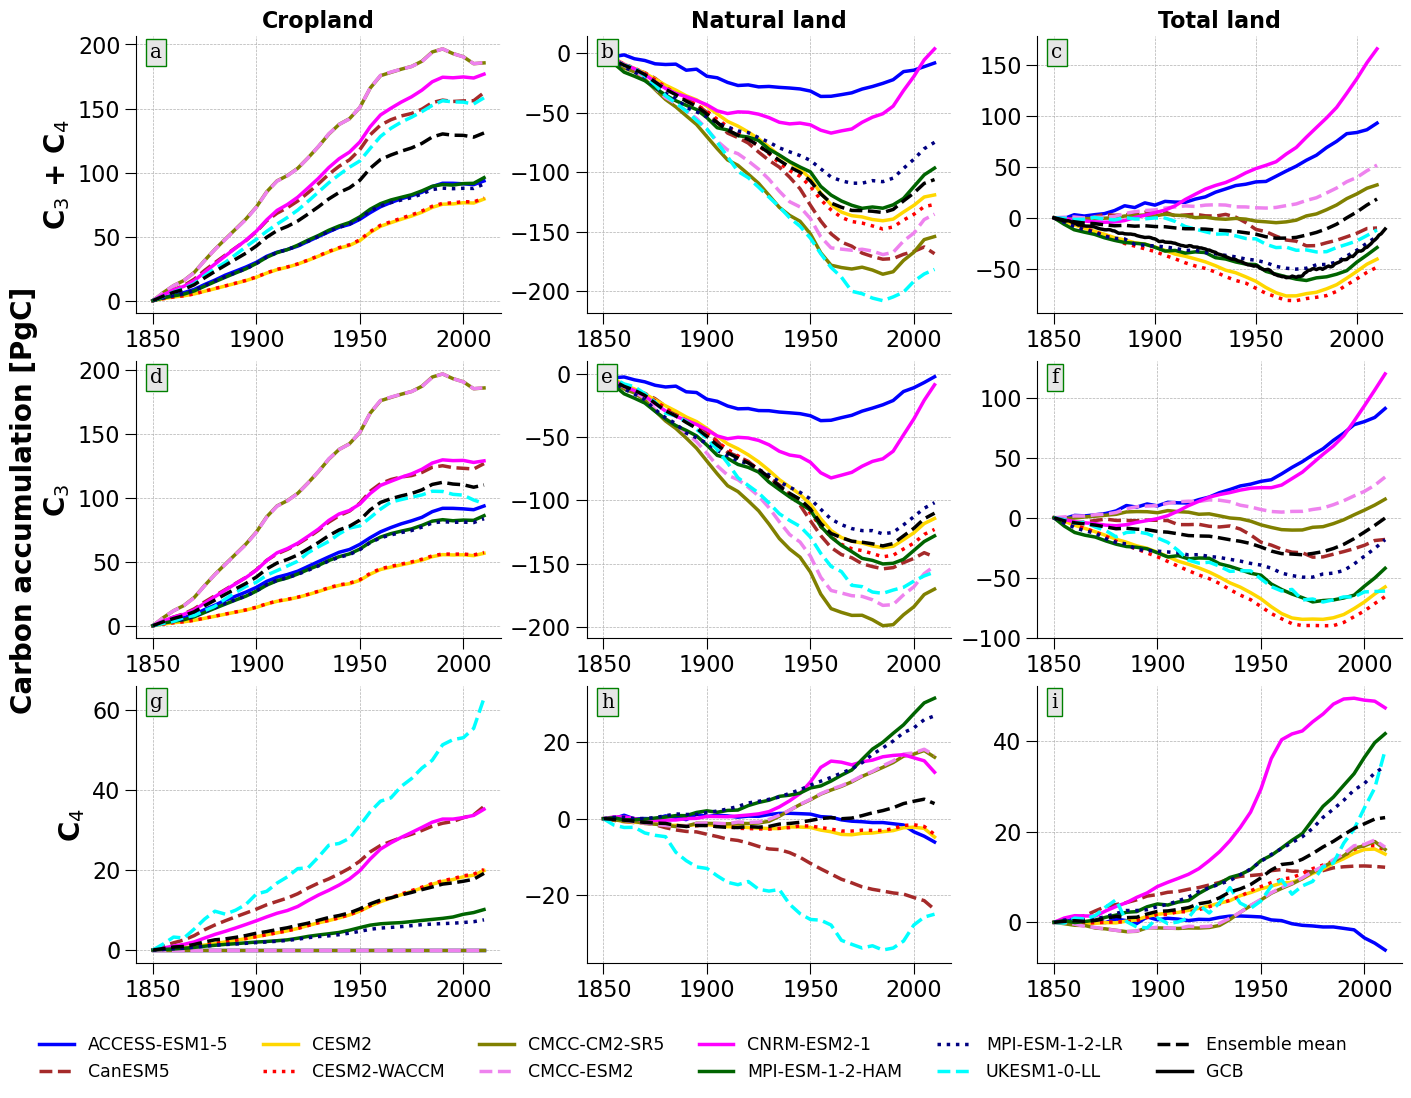

In [633]:
from matplotlib.ticker import MaxNLocator #For ticks adjustment
# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']],
                              figsize=(14, 10), layout="constrained")

years = np.arange(1850, 2015, 5)  # The years for the x-axis

# Plotting the crop on the 'a' axis of the mosaic
plot_figca(ax=axs['a'], years=years, y=crp6.iloc[:, 0:10]/10E11,
           mean=crp6['Mean']/10E11)
axs['a'].set_ylabel(r'C$_{3}$ + C$_{4}$', fontsize=20, weight='bold')
axs['a'].set_title('Cropland', fontsize=16, weight = 'bold')
axs['a'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)

# Plotting the natural on the 'e' axis of the mosaic
plot_figca(ax=axs['b'], years=years, y=nat6.iloc[:, 0:10]/10E11, 
         mean=nat6['Mean']/10E11)
#axs['b'].set_ylim(310, 600)

axs['b'].set_title('Natural land', fontsize=16, weight = 'bold')
axs['b'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['b'].spines['right'].set_visible(False)
axs['b'].spines['top'].set_visible(False)
axs['b'].grid(linestyle='--', linewidth=0.5) 



# Plotting the total on the 'c' axis of the mosaic
plot_figca(ax=axs['c'], years=years, y=tot6.iloc[:, 0:10]/10E11, 
         mean=tot6['Mean']/10E11)
axs['c'].plot(gcb['Year'], gcb['carb_acum'], label = 'GCB', 
         color = 'black', ls = '-', lw = 2.5)
axs['c'].set_title('Total land', fontsize=16, weight = 'bold')
axs['c'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['c'].spines['right'].set_visible(False)
axs['c'].spines['top'].set_visible(False)
axs['c'].grid(linestyle='--', linewidth=0.5)
#axs['c'].set_ylim(350, 700)


# Plotting the C3 crops on the 'd' axis of the mosaic
plot_figca(ax=axs['d'], years=years, y=C3crp6.iloc[:, 0:10]/10E11, 
         mean=C3crp6['Mean']/10E11)

axs['d'].set_ylabel(r'Carbon accumulation [PgC]' + '\n' + r'C$_{3}$',
                    fontsize=20, weight='bold')
axs['d'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
axs['d'].spines['right'].set_visible(False)
axs['d'].spines['top'].set_visible(False)
axs['d'].grid(linestyle='--', linewidth=0.5) 


# Plotting the C3 natural on the 'e' axis of the mosaic
plot_figca(ax=axs['e'], years=years, y=C3nat6.iloc[:, 0:10]/10E11, 
         mean=C3nat6['Mean']/10E11)
axs['e'].tick_params(axis = 'both', which = 'both', labelsize=16, size=8)
#axs['e'].set_ylim(55, 80)
axs['e'].spines['right'].set_visible(False)
axs['e'].spines['top'].set_visible(False)
axs['e'].grid(linestyle ='--', linewidth=0.5) 


# Plotting the total C3 on the 'f' axis of the mosaic
plot_figca(ax=axs['f'], years=years, y=C36.iloc[:, 0:10]/10E11, 
         mean=C36['Mean']/10E11)
#axs['f'].set_ylim(62, 90)
axs['f'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['f'].spines['right'].set_visible(False)
axs['f'].spines['top'].set_visible(False)
axs['f'].grid(linestyle = '--', linewidth=0.5)

# Plotting the C4 crops on the 'g' axis of the mosaic
plot_figca(ax=axs['g'], years=years, y=C4crp6.iloc[:, 0:10]/10E11, 
         mean=C4crp6['Mean']/10E11)
#axs['g'].set_ylim(0, 5)

axs['g'].set_ylabel(r'C$_{4}$ ', 
                    fontsize=20, weight = 'bold')
axs['g'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['g'].spines['right'].set_visible(False)
axs['g'].spines['top'].set_visible(False)
axs['g'].grid(linestyle='--', linewidth=0.5) 
    
# Plotting the total on the 'h' axis of the mosaic
plot_figca(ax=axs['h'], years=years, y=C4nat6.iloc[:, 0:10]/10E11, 
         mean=C4nat6['Mean']/10E11)
axs['h'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['h'].spines['right'].set_visible(False)
axs['h'].spines['top'].set_visible(False)
axs['h'].grid(linestyle='--', linewidth=0.5) 
#axs['h'].set_ylim(22, 70)


# Plotting the 3 total on the 'i' axis of the mosaic
plot_figca(ax=axs['i'], years=years, y=C46.iloc[:, 0:10]/10E11, 
         mean=C46['Mean']/10E11)

axs['i'].tick_params(axis = 'both', which = 'both',labelsize=16, size=8)
axs['i'].spines['right'].set_visible(False)
axs['i'].spines['top'].set_visible(False)
axs['i'].grid(linestyle='--', linewidth=0.5)

#Make the legend
# Combine handles and labels from the relevant axes for the global legend
handles, labels = [], []
for ax_key in ['c', 'g', 'h', 'i']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'c'
fig.legend(handles, labels, fontsize=12.5, loc='upper left', ncol=6,
           bbox_to_anchor=(0.0125, 0.3, 0.5, -0.315), frameon=False)

import matplotlib.transforms as mtransforms  # Add this line if transforms are needed
from matplotlib.ticker import MaxNLocator #For ticks adjustment

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='x-large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.9', edgecolor='green', pad=3.0))
    
# Save the plot
plt.savefig('/Users/jo122/CMIP6/2025/PaperFigures_06052025/land_Carbon_accumulation_1850_2014_250623.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)

    
# Show the plot
plt.show()


## Plot carbon content

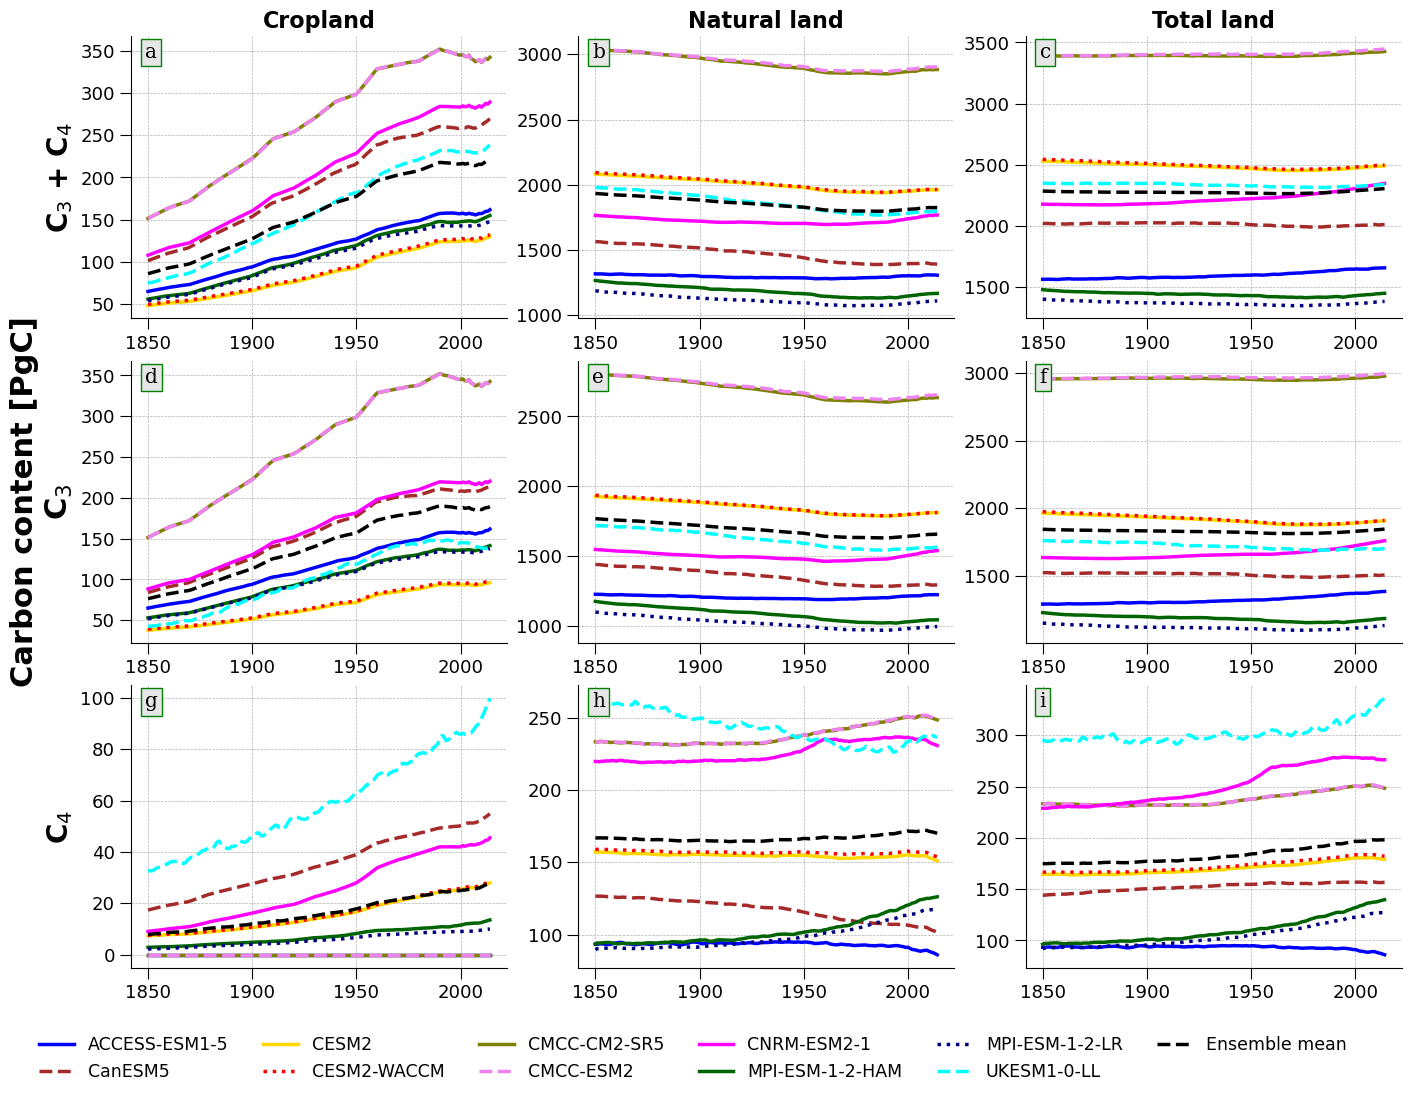

In [635]:
from matplotlib.ticker import MaxNLocator #For ticks adjustment
# Create the mosaic subplot layout
fig, axs = plt.subplot_mosaic([['a', 'b', 'c'], ['d', 'e', 'f'], ['g', 'h', 'i']],
                              figsize=(14, 10), layout="constrained")

years = np.arange(1850, 2015, 1)  # The years for the x-axis

# Plotting the crop on the 'a' axis of the mosaic
plot_figca(ax=axs['a'], years=years, y=crp3.iloc[:, 1:11]/10E11,
           mean=crp3['Mean']/10E11)
axs['a'].set_ylabel(r'C$_{3}$ + C$_{4}$', fontsize=20, weight='bold')
axs['a'].set_title('Cropland', fontsize=16, weight = 'bold')
axs['a'].tick_params(axis = 'both', which = 'both', labelsize=13, size=8)
axs['a'].spines['right'].set_visible(False)
axs['a'].spines['top'].set_visible(False)
axs['a'].grid(linestyle='--', linewidth=0.5)

# Plotting the natural on the 'e' axis of the mosaic
plot_figca(ax=axs['b'], years=years, y=nat3.iloc[:, 1:11]/10E11, 
         mean=nat3['Mean']/10E11)
#axs['b'].set_ylim(310, 300)

axs['b'].set_title('Natural land', fontsize=16, weight = 'bold')
axs['b'].tick_params(axis = 'both', which = 'both', labelsize=13, size=8)
axs['b'].spines['right'].set_visible(False)
axs['b'].spines['top'].set_visible(False)
axs['b'].grid(linestyle='--', linewidth=0.5) 



# Plotting the total on the 'c' axis of the mosaic
plot_figca(ax=axs['c'], years=years, y=tot3.iloc[:, 1:11]/10E11, 
         mean=tot3['Mean']/10E11)
axs['c'].set_title('Total land', fontsize=16, weight = 'bold')
axs['c'].tick_params(axis = 'both', which = 'both',labelsize=13, size=8)
axs['c'].spines['right'].set_visible(False)
axs['c'].spines['top'].set_visible(False)
axs['c'].grid(linestyle='--', linewidth=0.5)
#axs['c'].set_ylim(350, 700)


# Plotting the C3 crops on the 'd' axis of the mosaic
plot_figca(ax=axs['d'], years=years, y=C3crp3.iloc[:, 1:11]/10E11, 
         mean=C3crp3['Mean']/10E11)

axs['d'].set_ylabel(r'Carbon content [PgC]' + '\n' + r'C$_{3}$',
                    fontsize=22, weight='bold')
axs['d'].tick_params(axis = 'both', which = 'both', labelsize=13, size=8)
axs['d'].spines['right'].set_visible(False)
axs['d'].spines['top'].set_visible(False)
axs['d'].grid(linestyle='--', linewidth=0.5) 


# Plotting the C3 natural on the 'e' axis of the mosaic
plot_figca(ax=axs['e'], years=years, y=C3nat3.iloc[:, 1:11]/10E11, 
         mean=C3nat3['Mean']/10E11)
axs['e'].tick_params(axis = 'both', which = 'both', labelsize=13, size=8)
#axs['e'].set_ylim(55, 80)
axs['e'].spines['right'].set_visible(False)
axs['e'].spines['top'].set_visible(False)
axs['e'].grid(linestyle ='--', linewidth=0.5) 


# Plotting the total C3 on the 'f' axis of the mosaic
plot_figca(ax=axs['f'], years=years, y=C33.iloc[:, 1:11]/10E11, 
         mean=C33['Mean']/10E11)
#axs['f'].set_ylim(32, 90)
axs['f'].tick_params(axis = 'both', which = 'both',labelsize=13, size=8)
axs['f'].spines['right'].set_visible(False)
axs['f'].spines['top'].set_visible(False)
axs['f'].grid(linestyle = '--', linewidth=0.5)

# Plotting the C4 crops on the 'g' axis of the mosaic
plot_figca(ax=axs['g'], years=years, y=C4crp3.iloc[:, 1:11]/10E11, 
         mean=C4crp3['Mean']/10E11)
#axs['g'].set_ylim(0, 5)

axs['g'].set_ylabel(r'C$_{4}$ ', 
                    fontsize=20, weight = 'bold')
axs['g'].tick_params(axis = 'both', which = 'both',labelsize=13, size=8)
axs['g'].spines['right'].set_visible(False)
axs['g'].spines['top'].set_visible(False)
axs['g'].grid(linestyle='--', linewidth=0.5) 
    
# Plotting the total on the 'h' axis of the mosaic
plot_figca(ax=axs['h'], years=years, y=C4nat3.iloc[:, 1:11]/10E11, 
         mean=C4nat3['Mean']/10E11)
axs['h'].tick_params(axis = 'both', which = 'both',labelsize=13, size=8)
axs['h'].spines['right'].set_visible(False)
axs['h'].spines['top'].set_visible(False)
axs['h'].grid(linestyle='--', linewidth=0.5) 
#axs['h'].set_ylim(22, 70)


# Plotting the 3 total on the 'i' axis of the mosaic
plot_figca(ax=axs['i'], years=years, y=C43.iloc[:, 1:11]/10E11, 
         mean=C43['Mean']/10E11)

axs['i'].tick_params(axis = 'both', which = 'both',labelsize=13, size=8)
axs['i'].spines['right'].set_visible(False)
axs['i'].spines['top'].set_visible(False)
axs['i'].grid(linestyle='--', linewidth=0.5)

#Make the legend
# Combine handles and labels from the relevant axes for the global legend
handles, labels = [], []
for ax_key in ['c', 'g', 'h', 'i']:
    ax_handles, ax_labels = axs[ax_key].get_legend_handles_labels()
    handles.extend(ax_handles)
    labels.extend(ax_labels)

# Remove duplicate labels (optional, in case of identical legends)
from collections import OrderedDict
handles_labels = list(OrderedDict(zip(labels, handles)).items())
labels, handles = zip(*handles_labels)

# Create a single legend that spans across axes 'a' and 'c'
fig.legend(handles, labels, fontsize=12.5, loc='upper left', ncol=6,
           bbox_to_anchor=(0.0125, 0.3, 0.5, -0.315), frameon=False)

import matplotlib.transforms as mtransforms  # Add this line if transforms are needed
from matplotlib.ticker import MaxNLocator #For ticks adjustment

for label, ax in axs.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans,
            fontsize='x-large', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.9', edgecolor='green', pad=3.0))
    
# Save the plot
# Save the plot
plt.savefig('/Users/jo122/CMIP6/2025/PaperFigures_06052025/land_Carbon_content_1850_2014_250623.png', 
            dpi=500, bbox_inches='tight', pad_inches=0.1)
  
# Show the plot
plt.show()
